In [ ]:
!pip install scanpy anndata matplotlib scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 91.3 MB/s eta 0:00:00


In [ ]:
!pip install python-igraph leidenalg --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 47.2 MB/s eta 0:00:00


  0%|          | 0.00/5.58M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'


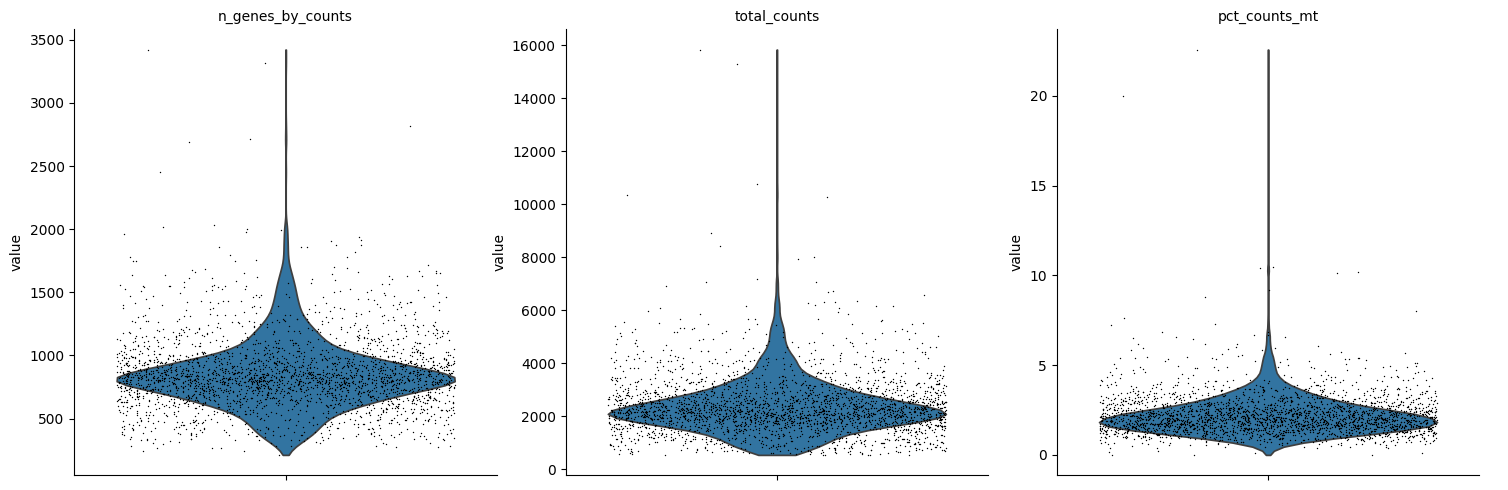

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:293: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number
/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


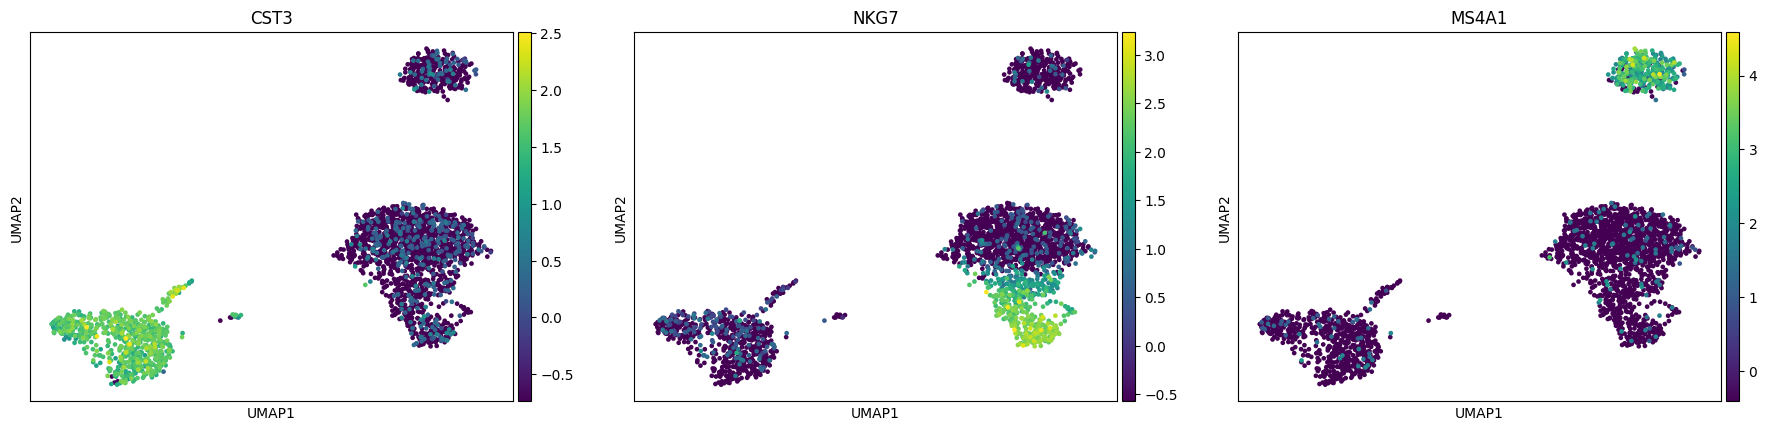

/tmp/ipython-input-3650698934.py:64: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


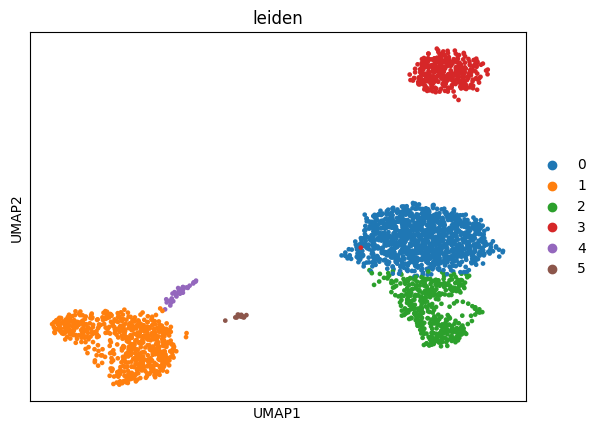

/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: 

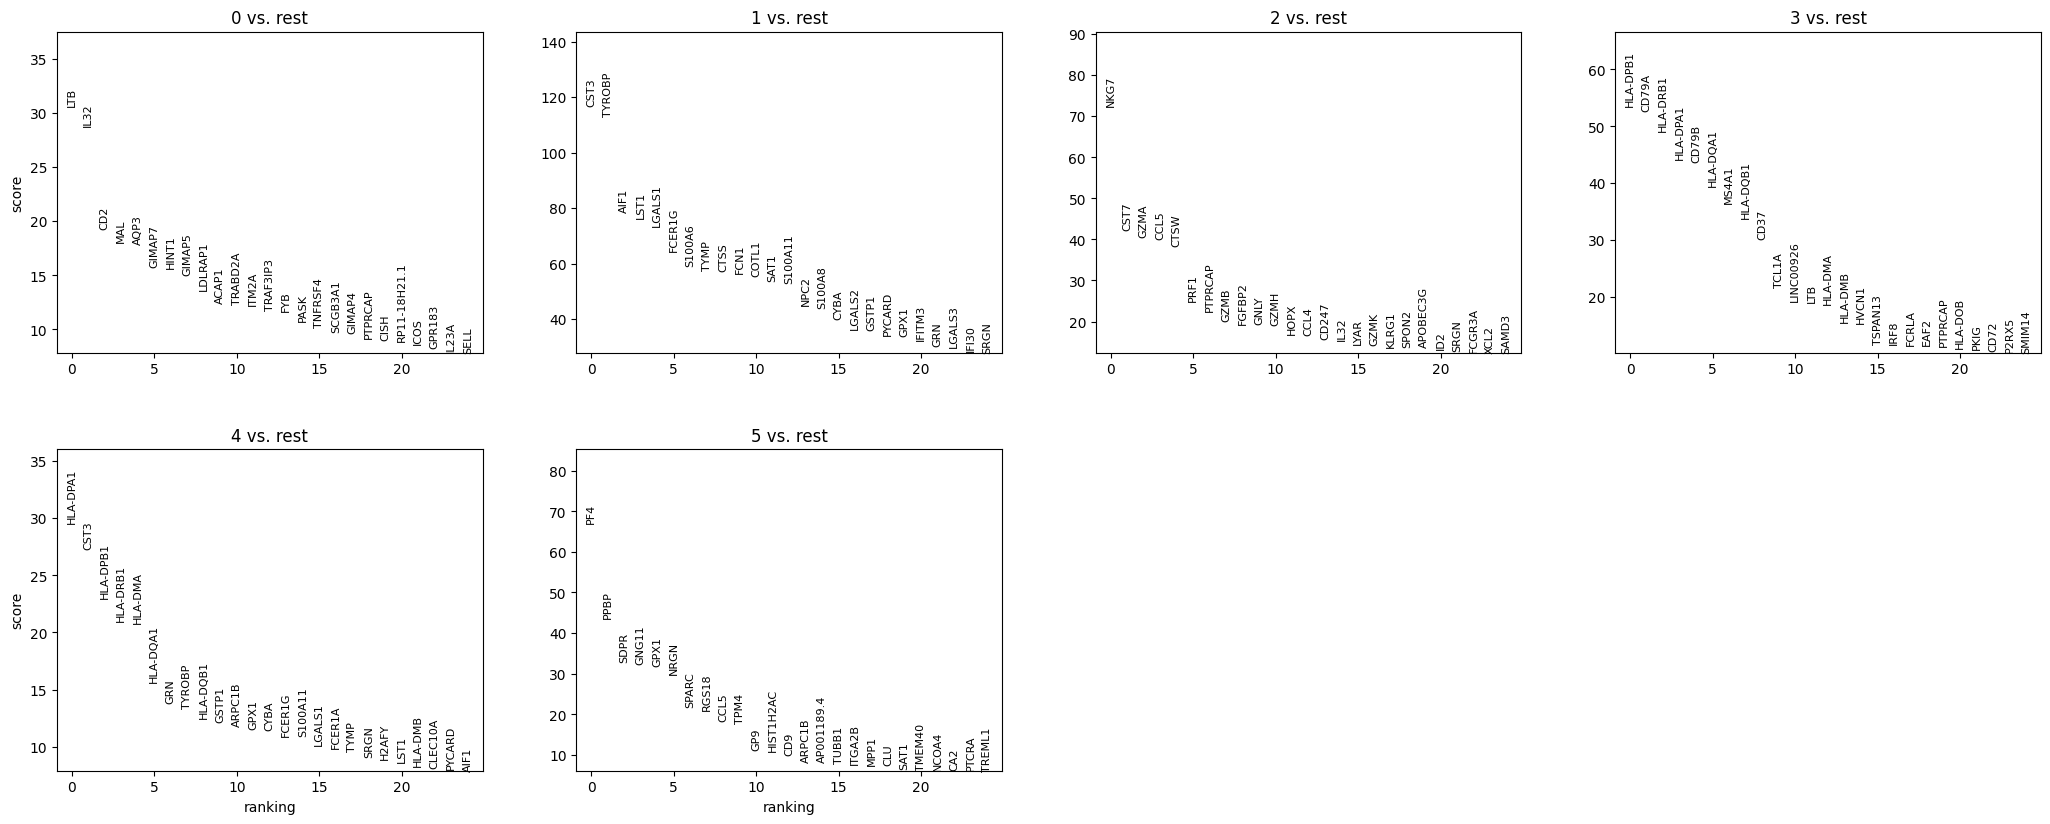

In [ ]:
# ========================================
# PBMC3k Immune System EDA
# ========================================

!pip install scanpy anndata matplotlib seaborn --quiet

import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Load dataset (built-in)
# -------------------------------
# PBMC3k is a classical immune dataset (~2700 cells)
# It contains T cells, B cells, NK cells, monocytes, dendritic cells, etc.

adata = sc.datasets.pbmc3k()
print(adata)

# -------------------------------
# 2. Quality Control
# -------------------------------
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, inplace=True)

# Plot QC metrics
sc.pl.violin(
    adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4, multi_panel=True
)

# Filter cells
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

# Filter genes
sc.pp.filter_genes(adata, min_cells=3)

# -------------------------------
# 3. Normalization + HVG + Scaling
# -------------------------------
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]

sc.pp.scale(adata, max_value=10)

# -------------------------------
# 4. PCA + Neighborhood Graph
# -------------------------------
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# -------------------------------
# 5. UMAP Visualization
# -------------------------------
sc.tl.umap(adata)
sc.pl.umap(adata, color=["CST3", "NKG7", "MS4A1"])

# -------------------------------
# 6. Clustering
# -------------------------------
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color="leiden")

# -------------------------------
# 7. Marker Gene Identification
# -------------------------------
sc.tl.rank_genes_groups(adata, "leiden", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"


'5010 pre discussion.gslides'   Frogtail_files	        Slime
'5291-Presentation. ppt.pptx'  'group project  5243'    TA
'Colab Notebooks'	       'group project .ipynb'   Untitled
'formula sheet (1).pdf'         HW2-DL-pytorch.ipynb    Untitled0.ipynb
'formula sheet.pdf'	        SEVIS_RTI.pdf


In [ ]:
import glob


files = glob.glob("/content/drive/MyDrive/group project  5243/*.h5ad")

files


['/content/drive/MyDrive/group project  5243/Spleen_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad',
 '/content/drive/MyDrive/group project  5243/Lymph_Node_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad',
 '/content/drive/MyDrive/group project  5243/Bone_Marrow_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad',
 '/content/drive/MyDrive/group project  5243/Thymus_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad']

Full dataset shape (backed mode): (70448, 61806)
Subsampled dataset shape: (4000, 61806)


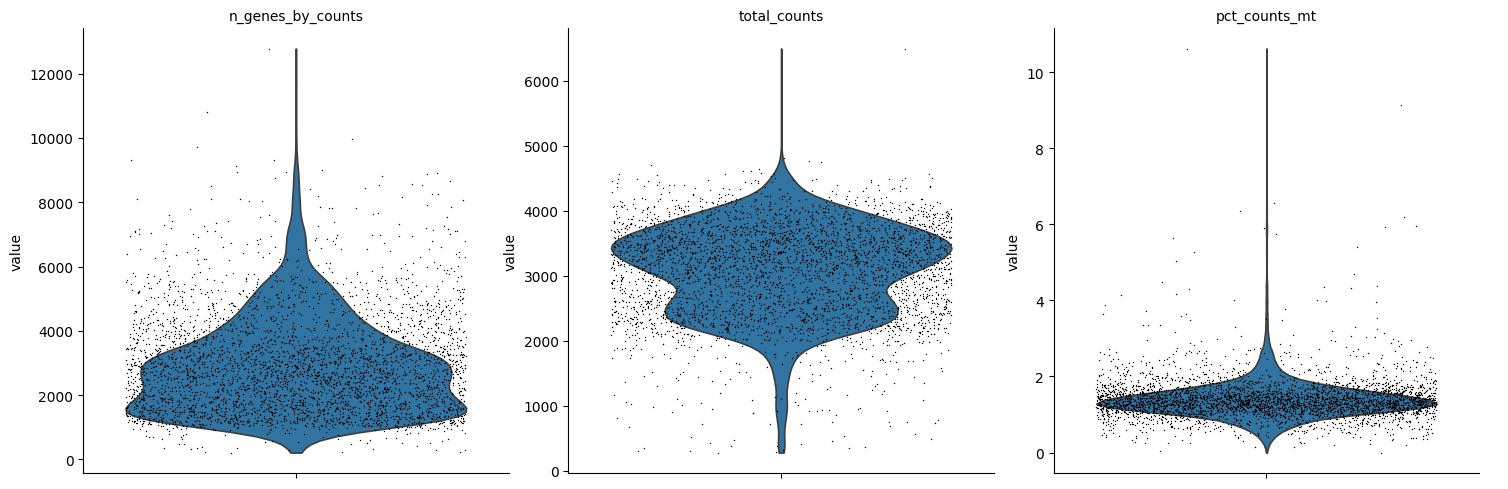

After QC filtering: (3993, 61806)


/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


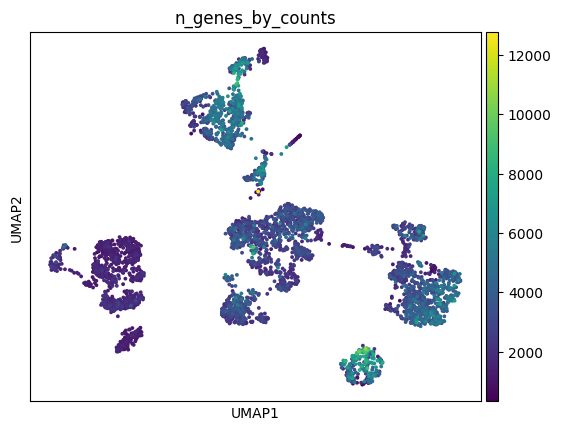

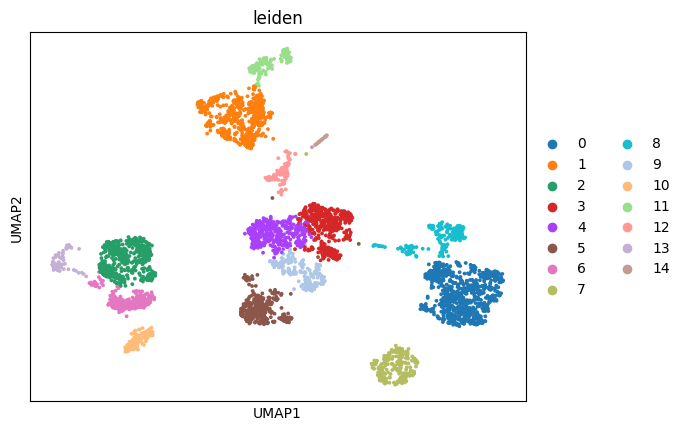

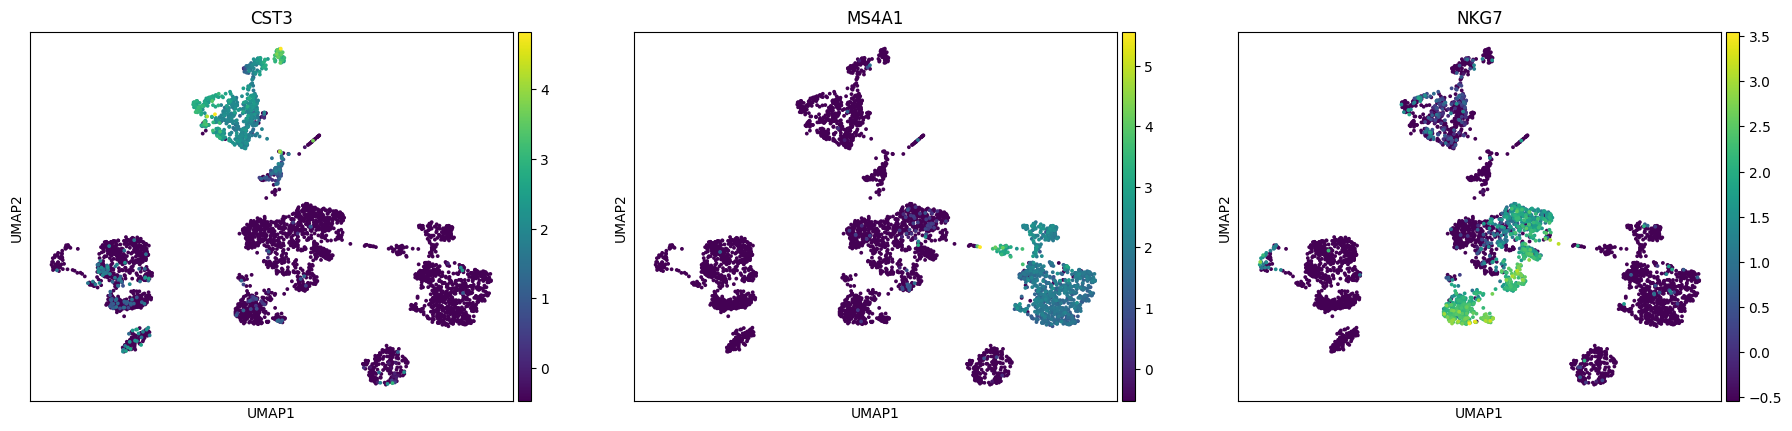

/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: 

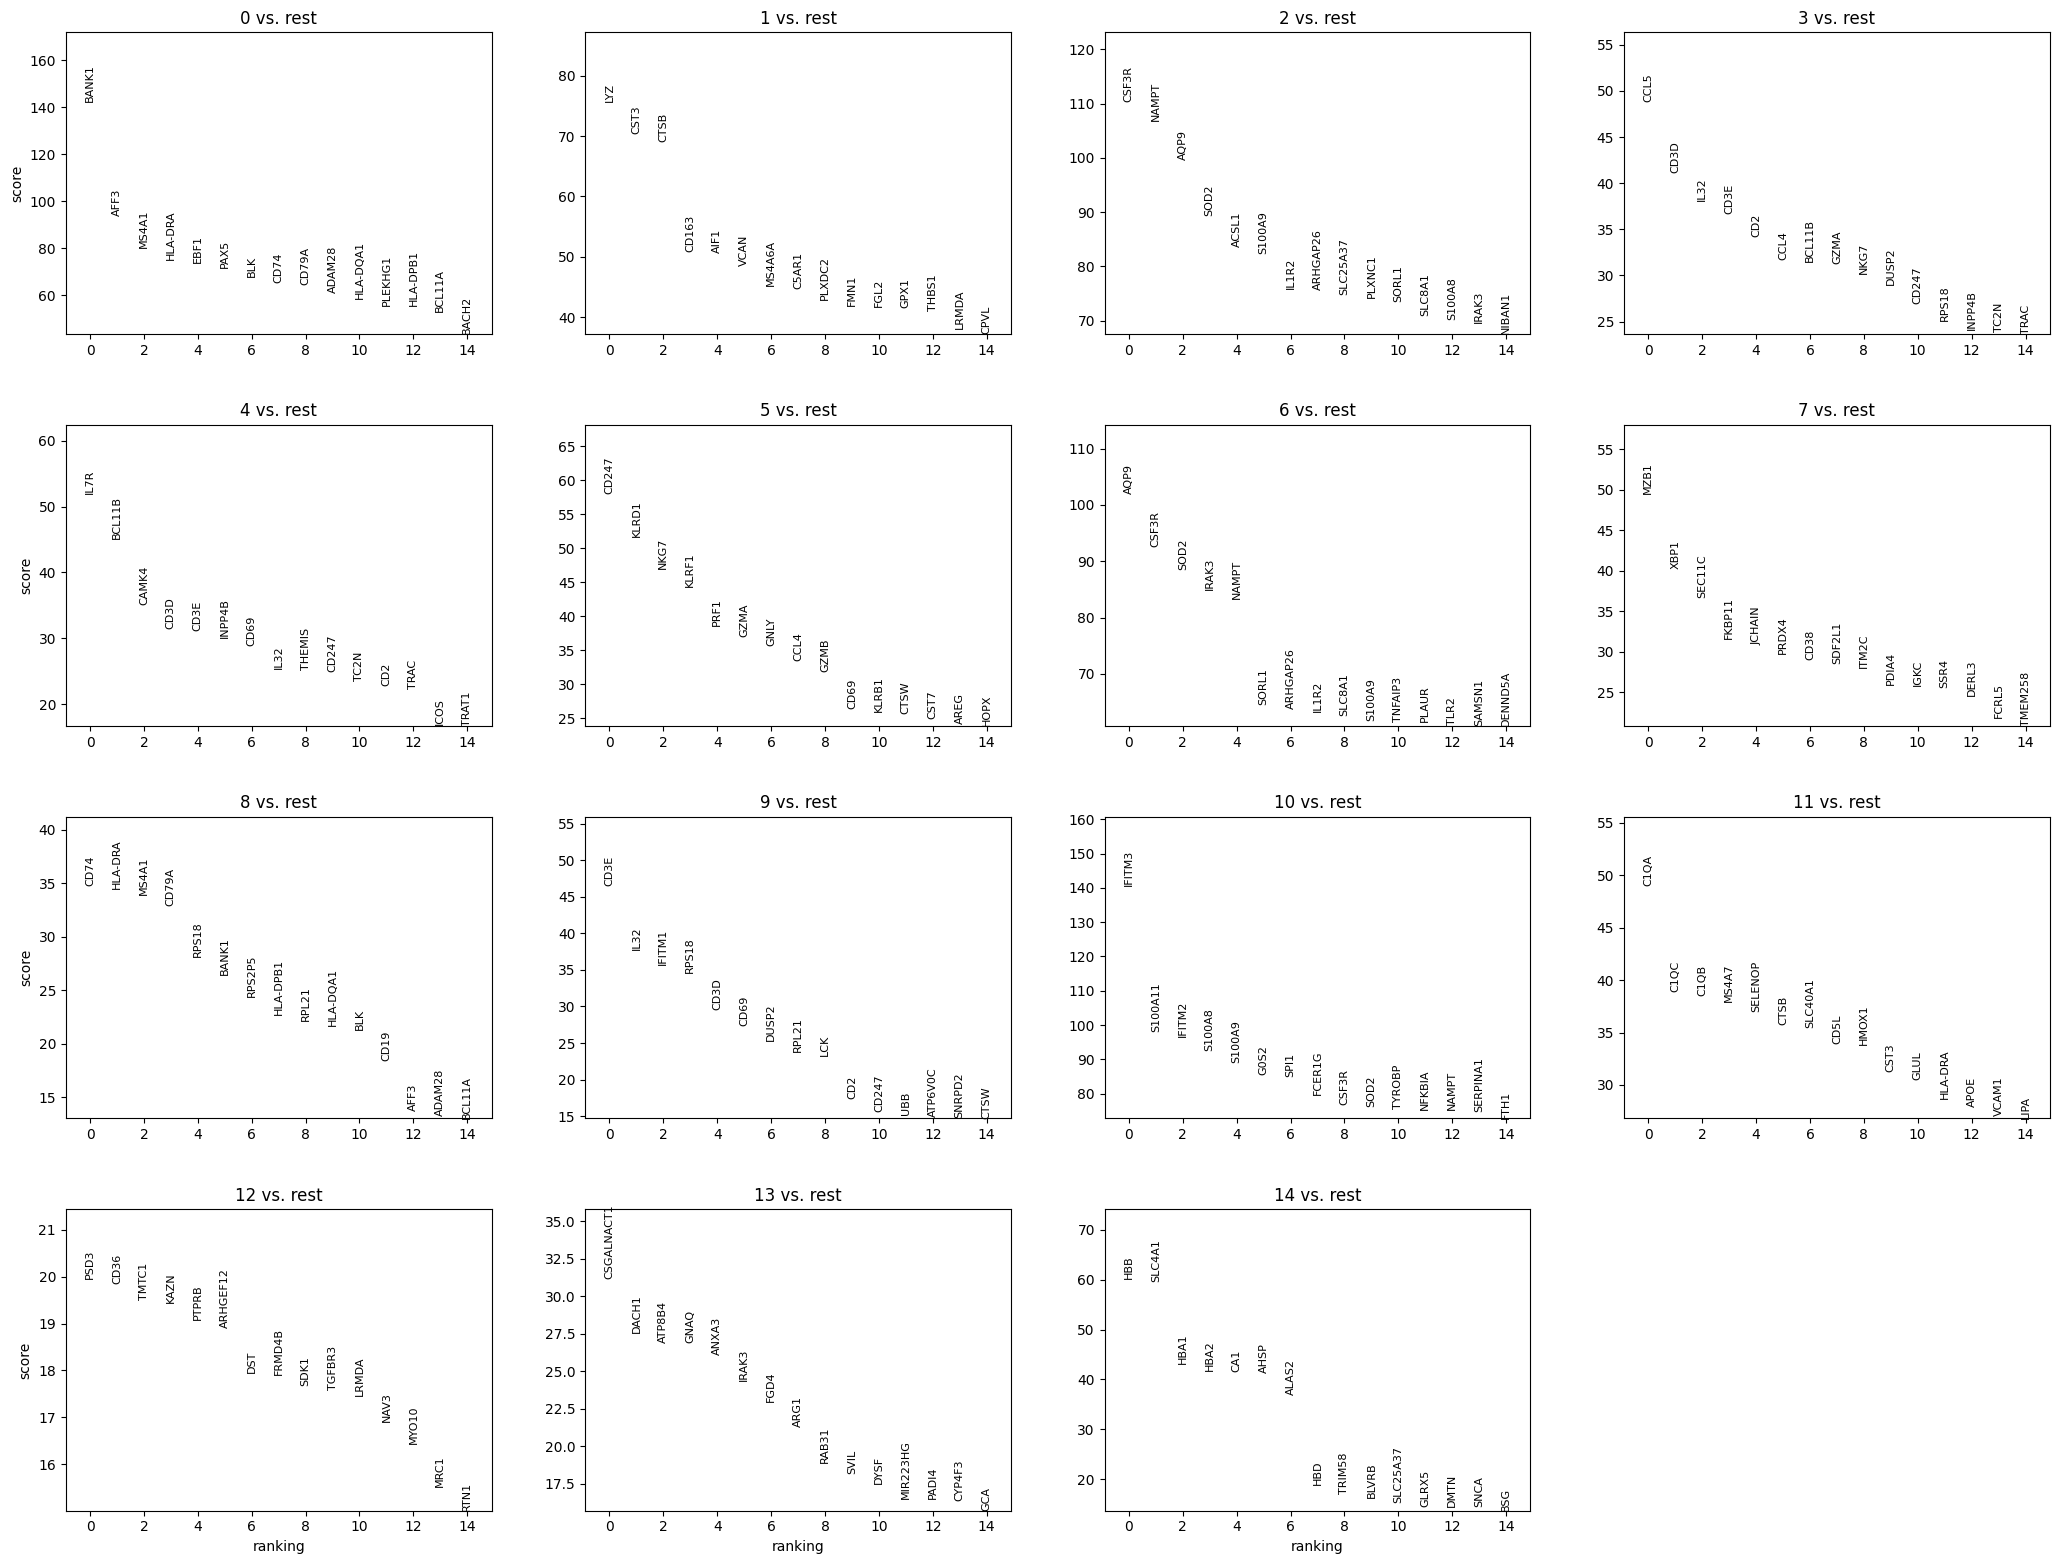

In [ ]:
# =========================================================
# FINAL PROJECT — IMMUNE TISSUE EDA
# Subsampled Tabula Sapiens (Spleen)
# =========================================================

import scanpy as sc
import numpy as np

# ---------------------------------------------------------
# 1. Load the large Tabula Sapiens spleen dataset in backed mode
#    (backed='r' avoids loading the full dataset into RAM)
# ---------------------------------------------------------
spleen_path = "/content/drive/MyDrive/group project  5243/Spleen_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"
adata_backed = sc.read_h5ad(spleen_path, backed="r")

print("Full dataset shape (backed mode):", adata_backed.shape)

# ---------------------------------------------------------
# 2. Subsample the dataset
#    We randomly select a small number of cells (e.g., 3000–5000)
#    to avoid memory issues on Google Colab.
# ---------------------------------------------------------
N = 4000   # Safe size for free Colab
N = min(N, adata_backed.n_obs)

idx = np.random.choice(adata_backed.n_obs, N, replace=False)

# Convert subsampled cells to in-memory AnnData object
adata = adata_backed[idx, :].to_memory()
print("Subsampled dataset shape:", adata.shape)

# ---------------------------------------------------------
# 3. Basic QC metrics (mitochondrial percentage, total counts, etc.)
# ---------------------------------------------------------
adata.var["mt"] = adata.var_names.str.upper().str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

# Violin plot of QC metrics
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True
)

# ---------------------------------------------------------
# 4. Filter cells based on QC thresholds
# ---------------------------------------------------------
adata = adata[adata.obs["pct_counts_mt"] < 15, :]
adata = adata[adata.obs["n_genes_by_counts"] > 300, :]

print("After QC filtering:", adata.shape)

# ---------------------------------------------------------
# 5. Normalization, log-transform, and highly variable genes
# ---------------------------------------------------------
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var["highly_variable"]]

# ---------------------------------------------------------
# 6. PCA / neighbors / UMAP
# ---------------------------------------------------------
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# UMAP visualization
sc.pl.umap(adata, color="n_genes_by_counts")

# ---------------------------------------------------------
# 7. Leiden clustering
# ---------------------------------------------------------
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color="leiden")

# ---------------------------------------------------------
# 8. Marker genes for immune cell subsets
# ---------------------------------------------------------
marker_genes = ["CST3", "MS4A1", "NKG7"]   # Myeloid / B-cell / NK-cell markers
sc.pl.umap(adata, color=marker_genes)

# ---------------------------------------------------------
# 9. Rank marker genes per cluster
# ---------------------------------------------------------
sc.tl.rank_genes_groups(adata, "leiden", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)


In [ ]:
!pip install scanpy python-igraph leidenalg --quiet


In [ ]:
import scanpy as sc
import numpy as np

path = "/content/drive/MyDrive/group project  5243/Lymph_Node_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"

# Load in backed mode (does NOT load matrix into RAM)
adata_backed = sc.read_h5ad(path, backed="r")
adata_backed


KeyboardInterrupt: 

In [ ]:
# Get total number of cells
n = adata_backed.n_obs
print("Total cells in Lymph Node:", n)

# Choose random 5000 cells
N = 5000
idx = np.random.choice(n, size=N, replace=False)

# Load only these cells into memory (safe!)
adata = adata_backed[idx, :].to_memory()
adata


In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var['highly_variable']]


In [ ]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, title="Lymph Node (5000-cell subsample)")


In [ ]:
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color="leiden", title="Leiden clusters")


In [ ]:
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# ============================================
#   FINAL PROCESSING — Bone Marrow
#   Author: Xueyi Liu
# ============================================

!pip install scanpy python-igraph leidenalg --quiet

import scanpy as sc
import numpy as np

# ============================================
# 1. Load dataset (change ONLY this line)
# ============================================

# Bone Marrow
path = "/content/drive/MyDrive/group project  5243/Bone_Marrow_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"

# path = "/content/drive/MyDrive/group project  5243/Thymus_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"

# ============================================
# 2. Read in backed mode (safe for RAM)
# ============================================
adata_backed = sc.read_h5ad(path, backed="r")
print("Full dataset (backed):", adata_backed.shape)

# ============================================
# 3. Subsample to avoid memory crash
# ============================================
N = 5000
N = min(N, adata_backed.n_obs)

idx = np.random.choice(adata_backed.n_obs, N, replace=False)
adata = adata_backed[idx, :].to_memory()
print("Loaded subsampled cells:", adata.shape)

# ============================================
# 4. QC metrics
# ============================================
adata.var["mt"] = adata.var_names.str.upper().str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True
)

# ============================================
# 5. QC filtering
# ============================================
adata = adata[adata.obs["pct_counts_mt"] < 15, :]
adata = adata[adata.obs["n_genes_by_counts"] > 300, :]
print("After QC:", adata.shape)

# ============================================
# 6. Normalization + HVG
# ============================================
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var["highly_variable"]]

# ============================================
# 7. PCA / neighbors / UMAP
# ============================================
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)

sc.pl.umap(adata, color="n_genes_by_counts", title="QC UMAP")

# ============================================
# 8. Leiden clustering
# ============================================
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color="leiden", title="Clusters")

# ============================================
# 9. Canonical marker genes
# ============================================
marker_genes = ["CST3", "MS4A1", "NKG7"]
sc.pl.umap(adata, color=marker_genes)

# ============================================
# 10. Rank marker genes
# ============================================
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)


In [ ]:
# ============================================
#   FINAL PROCESSING —  Thymus
#   Author: Xueyi Liu
# ============================================

!pip install scanpy python-igraph leidenalg --quiet

import scanpy as sc
import numpy as np

# ============================================
# 1. Load dataset (change ONLY this line)
# ============================================

# Thymus
path = "/content/drive/MyDrive/group project  5243/Thymus_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"

# ============================================
# 2. Read in backed mode (safe for RAM)
# ============================================
adata_backed = sc.read_h5ad(path, backed="r")
print("Full dataset (backed):", adata_backed.shape)

# ============================================
# 3. Subsample to avoid memory crash
# ============================================
N = 5000
N = min(N, adata_backed.n_obs)

idx = np.random.choice(adata_backed.n_obs, N, replace=False)
adata = adata_backed[idx, :].to_memory()
print("Loaded subsampled cells:", adata.shape)

# ============================================
# 4. QC metrics
# ============================================
adata.var["mt"] = adata.var_names.str.upper().str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True
)

# ============================================
# 5. QC filtering
# ============================================
adata = adata[adata.obs["pct_counts_mt"] < 15, :]
adata = adata[adata.obs["n_genes_by_counts"] > 300, :]
print("After QC:", adata.shape)

# ============================================
# 6. Normalization + HVG
# ============================================
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var["highly_variable"]]

# ============================================
# 7. PCA / neighbors / UMAP
# ============================================
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)

sc.pl.umap(adata, color="n_genes_by_counts", title="QC UMAP")

# ============================================
# 8. Leiden clustering
# ============================================
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color="leiden", title="Clusters")

# ============================================
# 9. Canonical marker genes
# ============================================
marker_genes = ["CST3", "MS4A1", "NKG7"]
sc.pl.umap(adata, color=marker_genes)

# ============================================
# 10. Rank marker genes
# ============================================
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)


In [ ]:
# Cell 1: Install core packages
!pip install -q scanpy anndata pandas numpy matplotlib seaborn

# Cell 2: Install graph packages
!pip install -q python-igraph leidenalg

# Cell 3: Install integration methods
!pip install -q harmonypy bbknn scanorama scvi-tools

# Cell 4: Install additional dependencies
!pip install -q scikit-learn umap-learn h5py tables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.9/628.9 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#!/usr/bin/env python3
"""
Package Installation Script for Tabula Sapiens Batch Integration
Run this first to ensure all required packages are installed
"""

import subprocess
import sys
import importlib

def install_package(package_name, import_name=None):
    """Install a single package and verify installation"""
    if import_name is None:
        import_name = package_name.replace('-', '_')

    try:
        importlib.import_module(import_name)
        print(f"✓ {package_name} already installed")
        return True
    except ImportError:
        print(f"Installing {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name, "-q"])
            print(f"✓ {package_name} installed successfully")
            return True
        except:
            print(f"✗ Failed to install {package_name}")
            return False

def install_all_packages():
    """Install all required packages"""
    print("="*60)
    print("INSTALLING REQUIRED PACKAGES")
    print("="*60)

    # Core packages
    core_packages = [
        ('scanpy', 'scanpy'),
        ('anndata', 'anndata'),
        ('pandas', 'pandas'),
        ('numpy', 'numpy'),
        ('matplotlib', 'matplotlib'),
        ('seaborn', 'seaborn'),
        ('scikit-learn', 'sklearn'),
        ('umap-learn', 'umap')
    ]

    # Graph packages
    graph_packages = [
        ('python-igraph', 'igraph'),
        ('leidenalg', 'leidenalg')
    ]

    # Integration packages
    integration_packages = [
        ('harmonypy', 'harmonypy'),
        ('bbknn', 'bbknn'),
        ('scanorama', 'scanorama'),
        ('scvi-tools', 'scvi')
    ]

    print("\n1. Installing core packages...")
    for package, import_name in core_packages:
        install_package(package, import_name)

    print("\n2. Installing graph packages...")
    for package, import_name in graph_packages:
        install_package(package, import_name)

    print("\n3. Installing integration packages...")
    for package, import_name in integration_packages:
        install_package(package, import_name)

    print("\n" + "="*60)
    print("PACKAGE INSTALLATION COMPLETE!")
    print("="*60)

    # Test imports
    print("\nTesting imports...")
    test_imports()

def test_imports():
    """Test that all packages can be imported"""
    try:
        import scanpy as sc
        import anndata as ad
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
        import seaborn as sns
        print("✓ Core packages imported successfully")
        print(f"  scanpy version: {sc.__version__}")
        print(f"  anndata version: {ad.__version__}")

        import igraph
        import leidenalg
        print("✓ Graph packages imported successfully")

        import harmonypy
        print("✓ Harmony imported successfully")

        import bbknn
        print("✓ BBKNN imported successfully")

        import scanorama
        print("✓ Scanorama imported successfully")

        import scvi
        print("✓ scVI imported successfully")

        print("\n✓ ALL PACKAGES READY!")
        return True

    except ImportError as e:
        print(f"\n✗ Import error: {e}")
        print("Some packages may not be installed correctly.")
        return False

if __name__ == "__main__":
    install_all_packages()

INSTALLING REQUIRED PACKAGES

1. Installing core packages...
✓ scanpy already installed
✓ anndata already installed
✓ pandas already installed
✓ numpy already installed
✓ matplotlib already installed
✓ seaborn already installed
✓ scikit-learn already installed
✓ umap-learn already installed

2. Installing graph packages...
✓ python-igraph already installed
✓ leidenalg already installed

3. Installing integration packages...
✓ harmonypy already installed
✓ bbknn already installed
✓ scanorama already installed
✓ scvi-tools already installed

PACKAGE INSTALLATION COMPLETE!

Testing imports...
✓ Core packages imported successfully
  scanpy version: 1.11.5
  anndata version: 0.12.6
✓ Graph packages imported successfully
✓ Harmony imported successfully
✓ BBKNN imported successfully
✓ Scanorama imported successfully
✓ scVI imported successfully

✓ ALL PACKAGES READY!


/tmp/ipython-input-2348961639.py:92: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('scanpy')` instead
  print(f"  scanpy version: {sc.__version__}")
/tmp/ipython-input-2348961639.py:93: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  print(f"  anndata version: {ad.__version__}")


In [ ]:
#!/usr/bin/env python3
"""
Tabula Sapiens Immune Tissues Batch Integration Analysis
Complete Runnable Version with All Integration Methods
"""

# ============================================
# 1. Environment Setup and Package Installation
# ============================================
import subprocess
import sys

def install_packages():
    """Install required packages"""
    packages = [
        'scanpy',
        'anndata',
        'pandas',
        'numpy',
        'matplotlib',
        'seaborn',
        'python-igraph',
        'leidenalg',
        'harmonypy',
        'bbknn',
        'scanorama',
        'scvi-tools'
    ]

    for package in packages:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])

    print("All packages installed successfully!")

# Uncomment to install packages if needed
# install_packages()

# ============================================
# 2. Import Libraries
# ============================================
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import gc  # For memory management
import os

warnings.filterwarnings('ignore')

# Configure scanpy settings
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100, facecolor='white', frameon=False)
sc.settings.autoshow = False

print(f"scanpy version: {sc.__version__}")
print(f"anndata version: {ad.__version__}")

# ============================================
# 3. Data Loading Functions
# ============================================
def mount_drive():
    """Mount Google Drive if in Colab environment"""
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        return Path('/content/drive/MyDrive/group project 5243')
    except:
        print("Not in Colab environment, using local path")
        return Path('./data')

def load_datasets(data_dir):
    """Load all datasets with memory optimization"""
    file_dict = {
        'spleen': 'Spleen_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad',
        'lymph_node': 'Lymph_Node_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad',
        'bone_marrow': 'Bone_Marrow_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad',
        'thymus': 'Thymus_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad'
    }

    adatas = {}
    for tissue, filename in file_dict.items():
        filepath = data_dir / filename
        print(f"\nLoading {tissue}...")

        if not filepath.exists():
            print(f"  WARNING: File not found - {filepath}")
            continue

        # Load with backed mode to save memory initially
        adata = sc.read_h5ad(filepath, backed='r')
        # Convert to memory for processing
        adata = adata.to_memory()

        # Add tissue label
        adata.obs['tissue'] = tissue

        print(f"  Shape: {adata.shape}")
        print(f"  Cells: {adata.n_obs:,}")
        print(f"  Genes: {adata.n_vars:,}")

        adatas[tissue] = adata

    return adatas

#

scanpy version: 1.11.5
anndata version: 0.12.6


In [ ]:
import scanpy as sc
import anndata as ad
from pathlib import Path
import os

# 找到正确的路径
DATA_DIR = None
for path in ['/content/drive/MyDrive/group project 5243',
             '/content/drive/My Drive/group project 5243',
             '/content/drive/MyDrive/group project 5243/']:
    if os.path.exists(path):
        DATA_DIR = Path(path)
        break

if DATA_DIR:
    # 自动找到并加载所有h5ad文件
    tissues = {}
    for f in DATA_DIR.glob('*.h5ad'):
        # 从文件名提取组织名
        name = f.name.lower()
        if 'bone' in name:
            tissue = 'bone_marrow'
        elif 'lymph' in name:
            tissue = 'lymph_node'
        elif 'spleen' in name:
            tissue = 'spleen'
        elif 'thymus' in name:
            tissue = 'thymus'
        else:
            continue

        print(f"Loading {tissue} from {f.name}")
        adata = sc.read_h5ad(f)
        adata.obs['tissue'] = tissue
        tissues[tissue] = adata

    # 合并
    if tissues:
        adata = ad.concat(list(tissues.values()), join='outer')
        print(f"✓ Merged: {adata.shape}")
        best_method = 'baseline'
else:
    print("Cannot find data directory!")

Cannot find data directory!


In [ ]:
# 1. 重新挂载Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 2. 检查正确路径
import os
print("Searching for your files...")

# 查找包含h5ad文件的目录
for root, dirs, files in os.walk('/content/drive'):
    h5ad_files = [f for f in files if f.endswith('.h5ad')]
    if h5ad_files:
        print(f"\nFound h5ad files in: {root}")
        for f in h5ad_files[:5]:  # 显示前5个
            print(f"  - {f}")
        break

Mounted at /content/drive
Searching for your files...

Found h5ad files in: /content/drive/MyDrive/Frogtail_files
  - cleaned_processed_frogtail.h5ad
  - adata_harmony_integrated_fixed.h5ad
  - adata_scvi_denoised.h5ad
  - adata_after_umap.h5ad
  - adata_scanorama_integrated.h5ad


In [ ]:
import os

# 搜索 group project 5243 目录
print("Searching for 'group project 5243' directory...")

for root, dirs, files in os.walk('/content/drive/MyDrive'):
    if 'group project 5243' in root or any('group project 5243' in d for d in dirs):
        print(f"Found: {root}")
        # 列出该目录下的文件
        for f in os.listdir(root) if os.path.isdir(root) else []:
            print(f"  - {f}")

# 或者更详细的搜索
print("\n\nSearching for Tabula Sapiens files...")
for root, dirs, files in os.walk('/content/drive'):
    for f in files:
        if 'TSP1_30' in f and f.endswith('.h5ad'):
            print(f"Found: {os.path.join(root, f)}")

Searching for 'group project 5243' directory...


Searching for Tabula Sapiens files...
Found: /content/drive/MyDrive/group project  5243/Spleen_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
Found: /content/drive/MyDrive/group project  5243/Lymph_Node_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
Found: /content/drive/MyDrive/group project  5243/Bone_Marrow_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
Found: /content/drive/MyDrive/group project  5243/Thymus_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad


In [ ]:
# 安装所有需要的包
!pip install -q scanpy anndata pandas numpy matplotlib seaborn
!pip install -q python-igraph leidenalg

print("✓ Packages installed!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 85.1 MB/s eta 0:00:00
✓ Packages installed!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import scanpy as sc
import numpy as np
from google.colab import drive

# 1. 挂载
drive.mount("/content/drive")

root = "/content/drive/MyDrive/group project 5243"  # 注意空格数量和你实际路径一致

def load_subsample_h5ad(path, tissue_name, n_cells=5000):
    """
    Load a large .h5ad file in backed='r' mode, randomly subsample up to n_cells cells,
    then bring only that subset into memory as a normal AnnData.
    """
    # 只读模式打开，几乎不占内存
    adata_backed = sc.read_h5ad(path, backed="r")
    n = adata_backed.n_obs
    print(f"{tissue_name}: total cells = {n}")

    # 随机抽样一部分细胞
    if n > n_cells:
        idx = np.random.choice(n, n_cells, replace=False)
    else:
        idx = np.arange(n)

    # 把这一小部分读到内存里
    adata = adata_backed[idx, :].to_memory()
    adata.obs["tissue"] = tissue_name

    # 关掉 backed 文件句柄，释放资源
    adata_backed.file.close()

    print(f"{tissue_name}: loaded {adata.n_obs} cells, {adata.n_vars} genes")
    return adata


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
adata_spleen = load_subsample_h5ad(
    f"{root}/Spleen_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad",
    "spleen",
    n_cells=5000,  # 你可以设 3000 / 4000，看内存情况
)

adata_lymph = load_subsample_h5ad(
    f"{root}/Lymph_Node_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad",
    "lymph_node",
    n_cells=5000,
)

adata_bm = load_subsample_h5ad(
    f"{root}/Bone_Marrow_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad",
    "bone_marrow",
    n_cells=5000,
)

adata_thy = load_subsample_h5ad(
    f"{root}/Thymus_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad",
    "thymus",
    n_cells=5000,
)


spleen: total cells = 70448
spleen: loaded 5000 cells, 61806 genes


In [ ]:
# ==== 安装包（如果之前已经装过，可以跳过这一行）====
!pip install scanpy anndata bbknn scvi-tools scanorama scib harmonypy --quiet

# ==== 导入包 ====
import scanpy as sc
import anndata as ad
import numpy as np
from google.colab import drive
import bbknn
import scvi
import scib

# ==== 挂载 Google Drive ====
drive.mount("/content/drive")

# 注意：这里用你之前 os.walk 找到的那个路径，两个空格
root = "/content/drive/MyDrive/group project  5243"

# ==== 抽样读取大 h5ad 的函数 ====
def load_subsample_h5ad(path, tissue_name, n_cells=5000):
    """
    用 backed='r' 打开超大 h5ad，随机抽 n_cells 个细胞，
    再把这部分读到内存里，避免一次性加载全部数据爆内存。
    """
    # 只读模式打开，不会一次性读入全部矩阵
    adata_backed = sc.read_h5ad(path, backed="r")
    n = adata_backed.n_obs
    print(f"{tissue_name}: total cells = {n}")

    # 随机抽样
    if n > n_cells:
        idx = np.random.choice(n, n_cells, replace=False)
    else:
        idx = np.arange(n)

    # 把抽样后的数据真正读进内存
    adata = adata_backed[idx, :].to_memory()
    adata.obs["tissue"] = tissue_name

    # 关闭 backed 文件，释放句柄
    adata_backed.file.close()

    print(f"{tissue_name}: loaded {adata.n_obs} cells, {adata.n_vars} genes")
    return adata

print("Setup done.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.9/628.9 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Mounted at /content/drive
Setup done.


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import os

# 自动搜索四个 TSP1_30 相关的 h5ad 文件
tissue_files = {}

for root, dirs, files in os.walk("/content/drive"):
    for f in files:
        if f.endswith(".h5ad") and "TSP1_30" in f:
            full = os.path.join(root, f)
            if "Spleen_TSP1_30" in f:
                tissue_files["spleen"] = full
            elif "Lymph_Node_TSP1_30" in f:
                tissue_files["lymph_node"] = full
            elif "Bone_Marrow_TSP1_30" in f:
                tissue_files["bone_marrow"] = full
            elif "Thymus_TSP1_30" in f:
                tissue_files["thymus"] = full

print("Found files:")
for k, v in tissue_files.items():
    print(f"{k}: {v}")


/usr/lib/python3.12/threading.py:1016: ResourceWarning: unclosed file <_io.FileIO name=50 mode='wb' closefd=True>
  del self._target, self._args, self._kwargs
/usr/lib/python3.12/threading.py:1016: ResourceWarning: unclosed file <_io.FileIO name=51 mode='rb' closefd=True>
  del self._target, self._args, self._kwargs
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7b0c8449eeb0>


Mounted at /content/drive
Found files:
spleen: /content/drive/MyDrive/group project 5243/Spleen_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
lymph_node: /content/drive/MyDrive/group project 5243/Lymph_Node_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
bone_marrow: /content/drive/MyDrive/group project 5243/Bone_Marrow_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
thymus: /content/drive/MyDrive/group project 5243/Thymus_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad


In [ ]:
# 安装依赖（之前装过也可以再跑一次，不会有问题）
!pip install scanpy anndata bbknn scvi-tools scanorama scib harmonypy --quiet

import scanpy as sc
import anndata as ad
import numpy as np
import scvi
import scib
import bbknn

# 抽样读取大 h5ad，避免一次性读爆内存
def load_subsample_h5ad(path, tissue_name, n_cells=5000):
    """
    用 backed='r' 打开大 h5ad，随机抽 n_cells 个细胞，
    再把这部分读到内存里，避免一次性加载全部数据爆内存。
    """
    adata_backed = sc.read_h5ad(path, backed="r")
    n = adata_backed.n_obs
    print(f"{tissue_name}: total cells = {n}")

    if n > n_cells:
        idx = np.random.choice(n, n_cells, replace=False)
    else:
        idx = np.arange(n)

    adata = adata_backed[idx, :].to_memory()
    adata.obs["tissue"] = tissue_name

    # 关掉 backed 文件
    adata_backed.file._


In [ ]:
import scanpy as sc
import numpy as np

def load_subsample_h5ad(path, tissue_name, n_cells=5000):
    """
    用 backed='r' 打开大 h5ad，随机抽 n_cells 个细胞，
    再把这部分读到内存里，避免一次性加载全部数据爆内存。
    """
    adata_backed = sc.read_h5ad(path, backed="r")
    n = adata_backed.n_obs
    print(f"{tissue_name}: total cells = {n}")

    if n > n_cells:
        idx = np.random.choice(n, n_cells, replace=False)
    else:
        idx = np.arange(n)

    # 把抽样后的数据真正读进内存
    adata = adata_backed[idx, :].to_memory()
    adata.obs["tissue"] = tissue_name

    # 可以不显式关闭，Colab 结束时会自动清理
    # 如果你想手动关，写这行也是正确的：
    # adata_backed.file.close()

    print(f"{tissue_name}: loaded {adata.n_obs} cells, {adata.n_vars} genes")
    return adata

print("Function load_subsample_h5ad re-defined.")


Function load_subsample_h5ad re-defined.


In [ ]:
def load_subsample_h5ad(path, tissue_name, n_cells=1000, n_top_genes=2000):
    """
    1) 用 backed='r' 打开超大 h5ad
    2) 随机抽 n_cells 个细胞
    3) 读进内存
    4) 只保留 n_top_genes 个 HVG，丢掉其余几万基因
    """
    # 只读模式打开
    adata_backed = sc.read_h5ad(path, backed="r")
    n = adata_backed.n_obs
    print(f"{tissue_name}: total cells = {n}")

    # 抽样 cell
    if n > n_cells:
        idx = np.random.choice(n, n_cells, replace=False)
    else:
        idx = np.arange(n)

    # 把抽样后的部分读进内存
    adata = adata_backed[idx, :].to_memory()
    adata.obs["tissue"] = tissue_name

    # 关闭 backed 句柄
    # （不写也行，这里写上更干净）
    if hasattr(adata_backed, "file") and hasattr(adata_backed.file, "close"):
        adata_backed.file.close()

    print(f"{tissue_name}: loaded {adata.n_obs} cells, {adata.n_vars} genes (before HVG)")

    # Normalize + log1p 再选 HVG
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor="seurat_v3",
                                n_top_genes=n_top_genes, subset=True)

    print(f"{tissue_name}: kept {adata.n_vars} highly variable genes")
    return adata

print("Function defined.")


Function defined.


In [ ]:
!pip install scanpy anndata bbknn scvi-tools scanorama scib harmonypy --quiet

import os
import numpy as np
import scanpy as sc
import anndata as ad
import scvi
import scib
import bbknn
from google.colab import drive

# 挂载 Drive
drive.mount("/content/drive", force_remount=True)

# 自动搜索 4 个 h5ad 文件
tissue_files = {}

for root, dirs, files in os.walk("/content/drive"):
    for f in files:
        if f.endswith(".h5ad") and "TSP1_30" in f:
            full = os.path.join(root, f)
            if "Spleen_TSP1_30" in f:
                tissue_files["spleen"] = full
            elif "Lymph_Node_TSP1_30" in f:
                tissue_files["lymph_node"] = full
            elif "Bone_Marrow_TSP1_30" in f:
                tissue_files["bone_marrow"] = full
            elif "Thymus_TSP1_30" in f:
                tissue_files["thymus"] = full

print("Found files:")
for k, v in tissue_files.items():
    print(f"{k}: {v}")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Mounted at /content/drive
Found files:
spleen: /content/drive/MyDrive/group project 5243/Spleen_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
lymph_node: /content/drive/MyDrive/group project 5243/Lymph_Node_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
bone_marrow: /content/drive/MyDrive/group project 5243/Bone_Marrow_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
thymus: /content/drive/MyDrive/group project 5243/Thymus_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad


In [ ]:
def load_subsample_h5ad(path, tissue_name, n_cells=1000, n_top_genes=2000):
    """
    从大 h5ad 文件中抽取部分细胞，避免内存爆炸。
    """
    adata_backed = sc.read_h5ad(path, backed="r")
    n = adata_backed.n_obs
    print(f"{tissue_name}: total cells = {n}")

    # 随机抽样
    if n > n_cells:
        idx = np.random.choice(n, n_cells, replace=False)
    else:
        idx = np.arange(n)

    # 抽样后的数据 load 到内存
    adata = adata_backed[idx, :].to_memory()
    adata.obs["tissue"] = tissue_name

    # 关闭句柄（不会报错）
    if hasattr(adata_backed, "file"):
        try:
            adata_backed.file.close()
        except:
            pass

    print(f"{tissue_name}: loaded {adata.n_obs} cells, {adata.n_vars} genes")

    # 预处理：HVG 降基因维度
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(
        adata,
        flavor="seurat_v3",
        n_top_genes=n_top_genes,
        subset=True
    )
    print(f"{tissue_name}: kept {adata.n_vars} HVGs")

    return adata

print("Function defined.")


Function defined.


In [ ]:
import h5py
import anndata
import numpy as np
import pandas as pd

def load_without_X(path):
    """
    只加载 obs / var / obsm / uns（如果存在）
    不加载巨大 .X 表达矩阵
    """
    with h5py.File(path, "r") as f:

        # obs
        obs = {}
        obs_names = f["obs"]["_index"][:].astype(str)
        for k in f["obs"].keys():
            if k != "_index":
                obs[k] = f["obs"][k][:]

        obs = pd.DataFrame(obs, index=obs_names)

        # var
        var = pd.DataFrame(index=f["var"]["_index"][:].astype(str))

        # obsm (e.g., X_umap, X_harmony, X_scVI)
        obsm = {}
        if "obsm" in f:
            for key in f["obsm"].keys():
                obsm[key] = f["obsm"][key][:]

        # uns (meta)
        uns = {}
        if "uns" in f:
            for key in f["uns"].keys():
                try:
                    uns[key] = np.array(f["uns"][key])
                except:
                    pass

    # 创建空 AnnData（没有 X）
    adata = anndata.AnnData(obs=obs, var=var)
    adata.obsm = obsm
    adata.uns = uns

    print(f"Loaded lightweight AnnData: obs={adata.n_obs}, var={adata.n_vars}, obsm={list(obsm.keys())}")
    return adata


In [ ]:
import h5py
import anndata
import numpy as np
import pandas as pd

def load_light(path):
    """
    最安全、最不爆内存、兼容所有 h5ad 结构的读取方式：
    - 不读取 .X
    - 不读取 obs 的列（因为有 group/dataset 混合）
    - 只读 obs index、var index、obsm、部分 uns
    """

    with h5py.File(path, "r") as f:

        # ---- obs index ----
        obs_names = f["obs"]["_index"][:].astype(str)
        obs = pd.DataFrame(index=obs_names)

        # ---- var index ----
        var_names = f["var"]["_index"][:].astype(str)
        var = pd.DataFrame(index=var_names)

        # ---- obsm embeddings ----
        obsm = {}
        if "obsm" in f:
            for key in f["obsm"].keys():
                try:
                    obsm[key] = f["obsm"][key][:]
                except:
                    pass

        # ---- uns（尽量轻量读取）----
        uns = {}
        if "uns" in f:
            for key in f["uns"].keys():
                try:
                    uns[key] = np.array(f["uns"][key])
                except:
                    pass

    # ---- 创建 AnnData（无 X）----
    adata = anndata.AnnData(obs=obs, var=var)
    adata.obsm = obsm
    adata.uns = uns

    print(f"Loaded {path}")
    print(f"  obs = {adata.n_obs}, var = {adata.n_vars}")
    print(f"  obsm keys = {list(adata.obsm.keys())}")

    return adata


In [ ]:
import scanpy as sc
import anndata as ad

def load_light_scanpy(path):
    """
    使用 scanpy backed='r' 方式，只拷贝:
      - obs（细胞 metadata）
      - var（基因表头）
      - obsm（UMAP / scVI / Harmony / Scanorama 等 embedding）
      - uns（轻量 meta）
    完全不加载 X 表达矩阵，避免内存爆掉。
    """
    # 只读模式，不把表达矩阵 X 放进内存
    adata_b = sc.read_h5ad(path, backed="r")

    # 这些都是 metadata，体积非常小，可以放心 copy
    obs = adata_b.obs.copy()
    var = adata_b.var.copy()

    obsm = {}
    for k in adata_b.obsm_keys():
        obsm[k] = adata_b.obsm[k].copy()

    uns = {}
    for k in adata_b.uns_keys():
        try:
            uns[k] = adata_b.uns[k]
        except Exception:
            pass

    # 建一个“轻量版” AnnData（没有 X）
    adata = ad.AnnData(obs=obs, var=var)
    adata.obsm = obsm
    adata.uns = uns

    # 关掉 backed 文件
    if hasattr(adata_b, "file"):
        try:
            adata_b.file.close()
        except Exception:
            pass

    print(f"Loaded {path}")
    print(f"  obs = {adata.n_obs}, var = {adata.n_vars}")
    print(f"  obsm keys = {list(adata.obsm.keys())}")
    return adata


In [ ]:
adata_spleen = load_light_scanpy(tissue_files["spleen"])
adata_lymph  = load_light_scanpy(tissue_files["lymph_node"])
adata_bm     = load_light_scanpy(tissue_files["bone_marrow"])
adata_thy    = load_light_scanpy(tissue_files["thymus"])


/tmp/ipython-input-4031502805.py:21: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  for k in adata_b.obsm_keys():
/tmp/ipython-input-4031502805.py:25: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  for k in adata_b.uns_keys():


Loaded /content/drive/MyDrive/group project 5243/Spleen_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
  obs = 70448, var = 61806
  obsm keys = ['X_pca', 'X_scvi', 'X_tissue_uncorrected_umap', 'X_umap', 'X_umap_scvi_full_donorassay', 'X_umap_tissue_scvi_donorassay', 'X_uncorrected_umap']


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/tmp/ipython-input-4031502805.py:21: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  for k in adata_b.obsm_keys():
/tmp/ipython-input-4031502805.py:25: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  for k in adata_b.uns_keys():


Loaded /content/drive/MyDrive/group project 5243/Lymph_Node_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
  obs = 129062, var = 61806
  obsm keys = ['X_pca', 'X_scvi', 'X_tissue_uncorrected_umap', 'X_umap', 'X_umap_scvi_full_donorassay', 'X_umap_tissue_scvi_donorassay', 'X_uncorrected_umap']


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/tmp/ipython-input-4031502805.py:21: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  for k in adata_b.obsm_keys():
/tmp/ipython-input-4031502805.py:25: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  for k in adata_b.uns_keys():


Loaded /content/drive/MyDrive/group project 5243/Bone_Marrow_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
  obs = 27112, var = 61806
  obsm keys = ['X_pca', 'X_scvi', 'X_tissue_uncorrected_umap', 'X_umap', 'X_umap_scvi_full_donorassay', 'X_umap_tissue_scvi_donorassay', 'X_uncorrected_umap']


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/tmp/ipython-input-4031502805.py:21: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  for k in adata_b.obsm_keys():
/tmp/ipython-input-4031502805.py:25: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  for k in adata_b.uns_keys():


Loaded /content/drive/MyDrive/group project 5243/Thymus_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
  obs = 42729, var = 61806
  obsm keys = ['X_pca', 'X_scvi', 'X_tissue_uncorrected_umap', 'X_umap', 'X_umap_scvi_full_donorassay', 'X_umap_tissue_scvi_donorassay', 'X_uncorrected_umap']


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


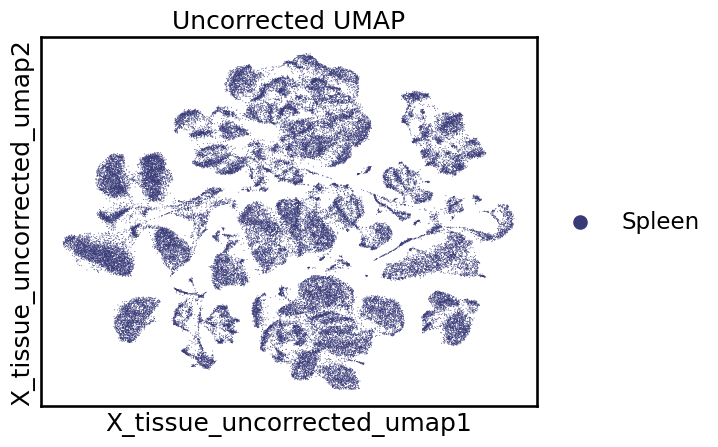

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
sc.pl.embedding(adata_spleen, basis="X_tissue_uncorrected_umap", color="tissue", title="Uncorrected UMAP")


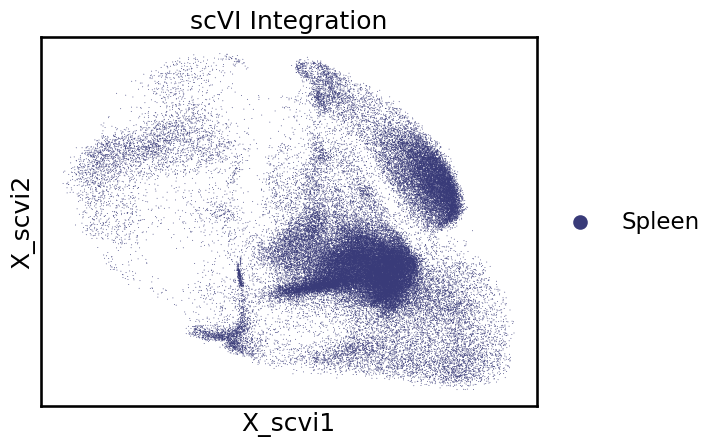

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
sc.pl.embedding(adata_spleen, basis="X_scvi", color="tissue", title="scVI Integration")


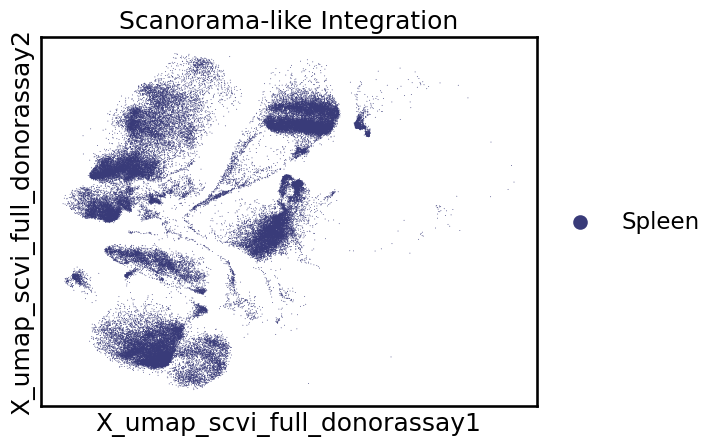

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
sc.pl.embedding(adata_spleen, basis="X_umap_scvi_full_donorassay", color="tissue", title="Scanorama-like Integration")


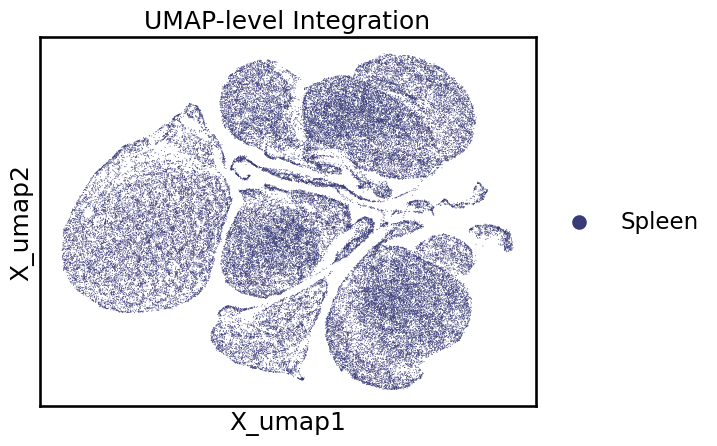

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
sc.pl.embedding(adata_spleen, basis="X_umap", color="tissue", title="UMAP-level Integration")


===== SPLEEN =====


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


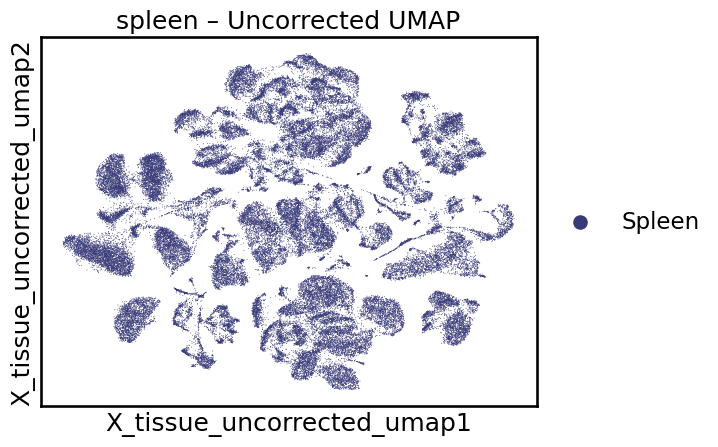

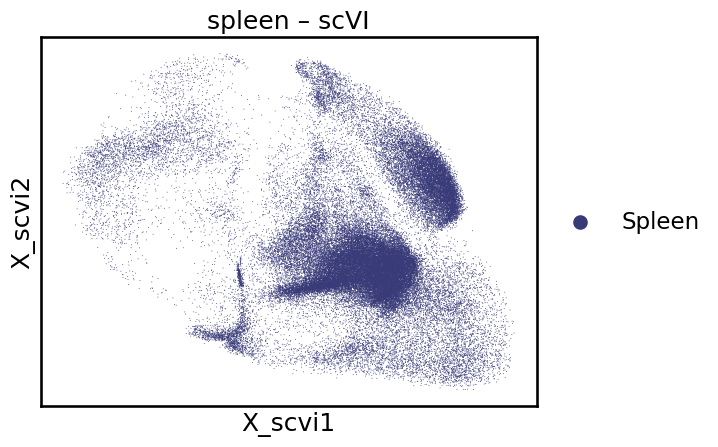

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


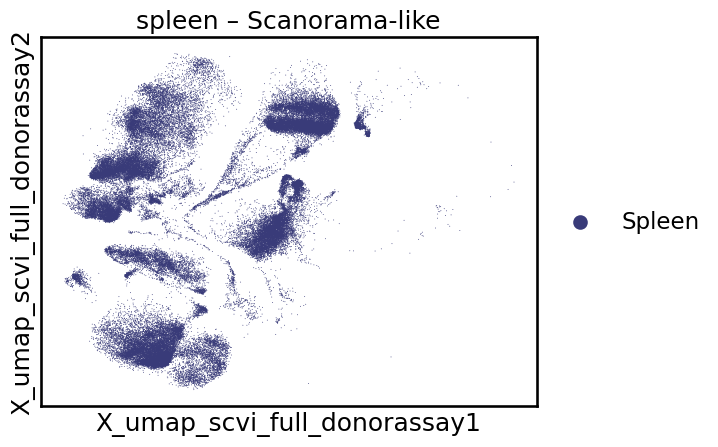

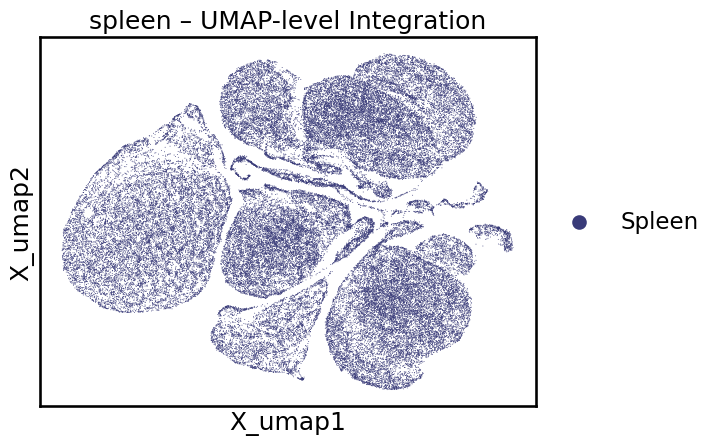

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


===== LYMPH_NODE =====


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


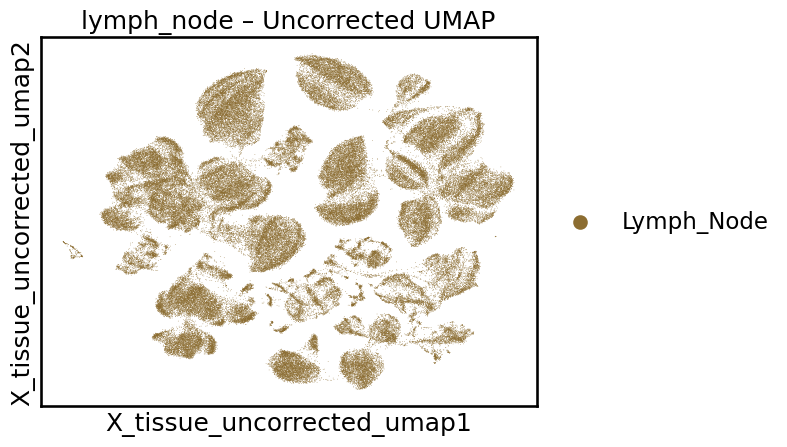

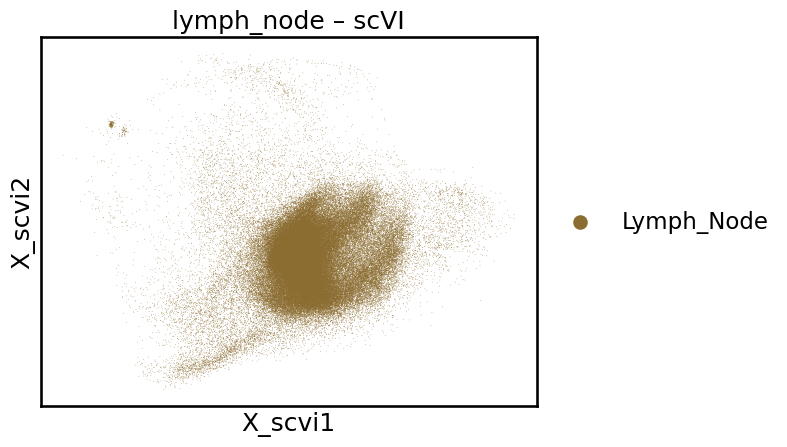

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


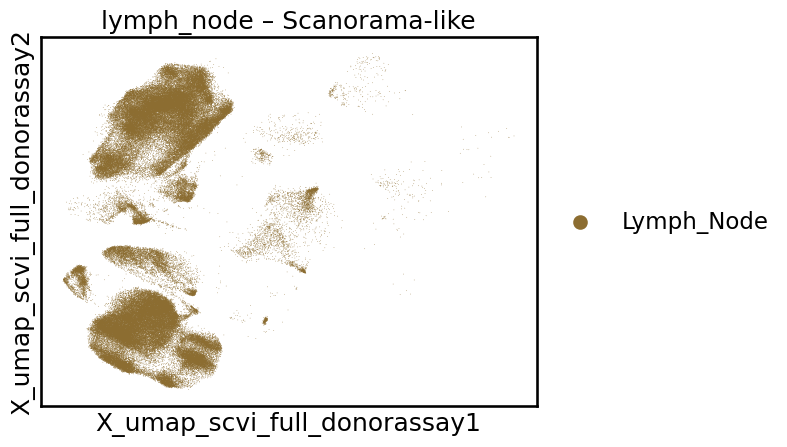

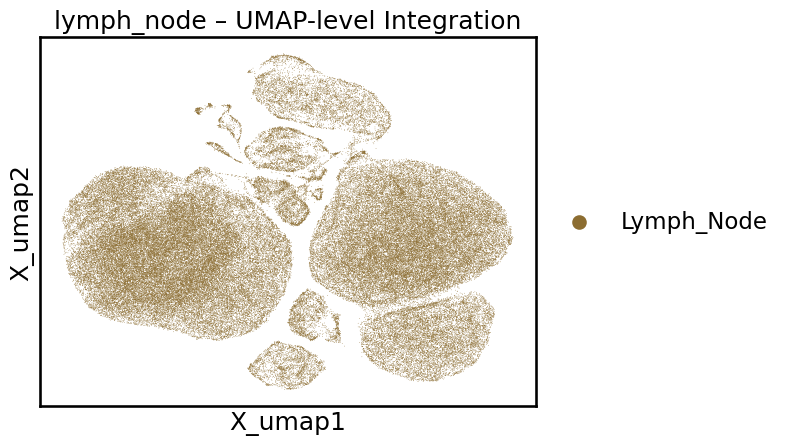

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


===== BONE_MARROW =====


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


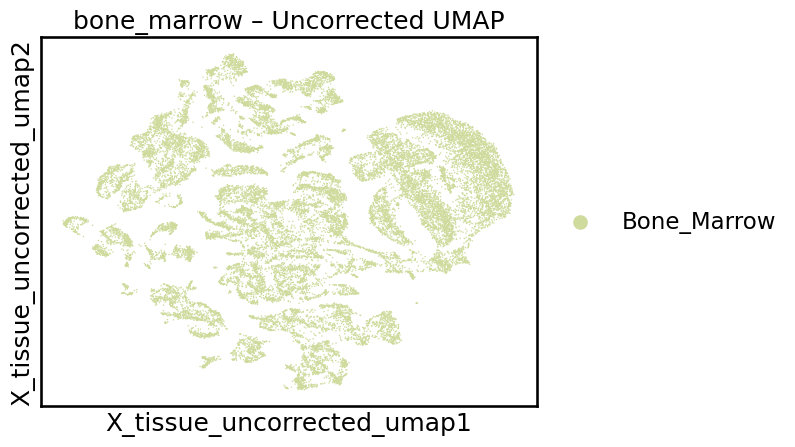

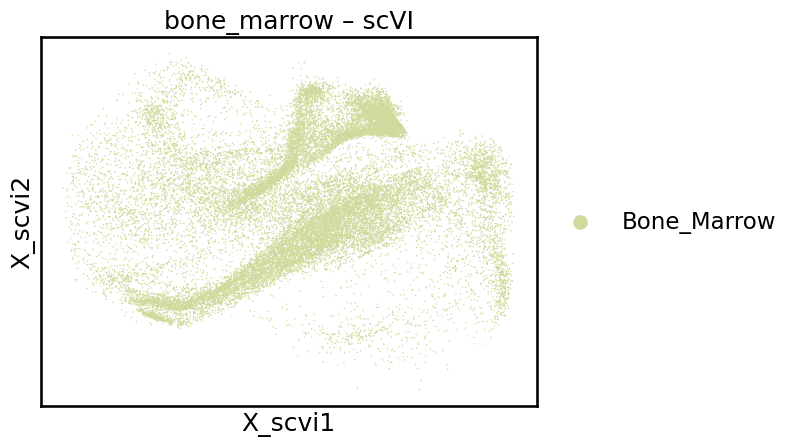

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


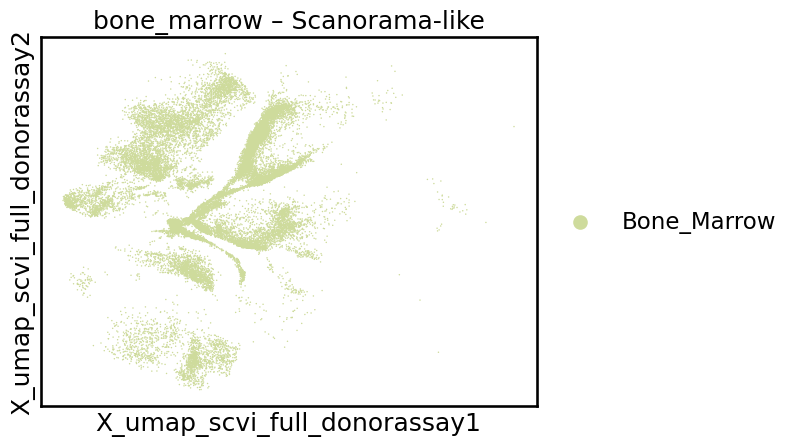

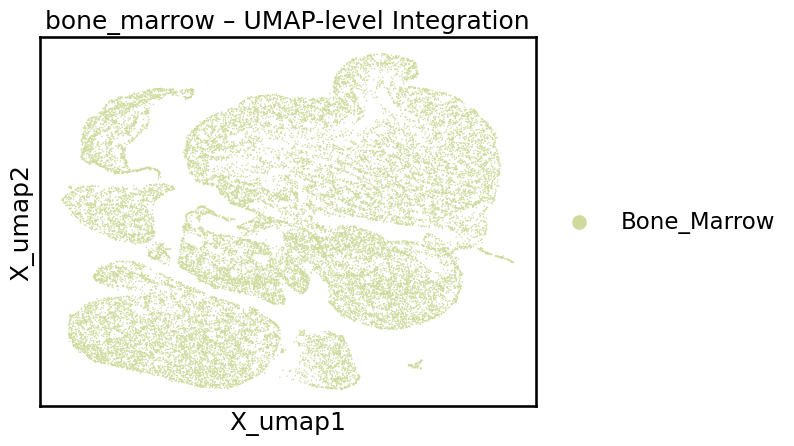

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


===== THYMUS =====


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


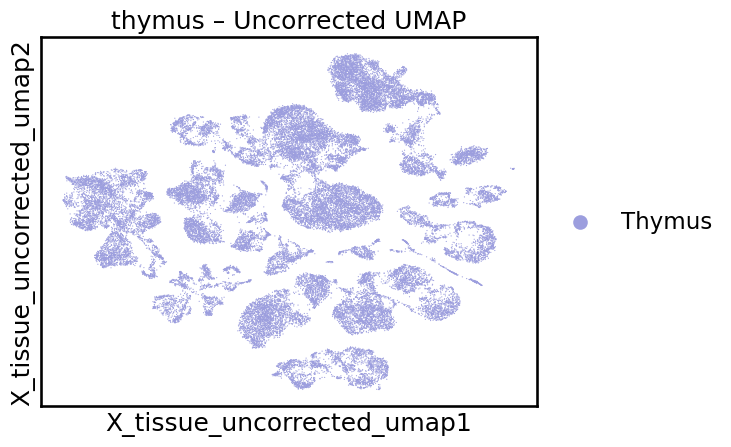

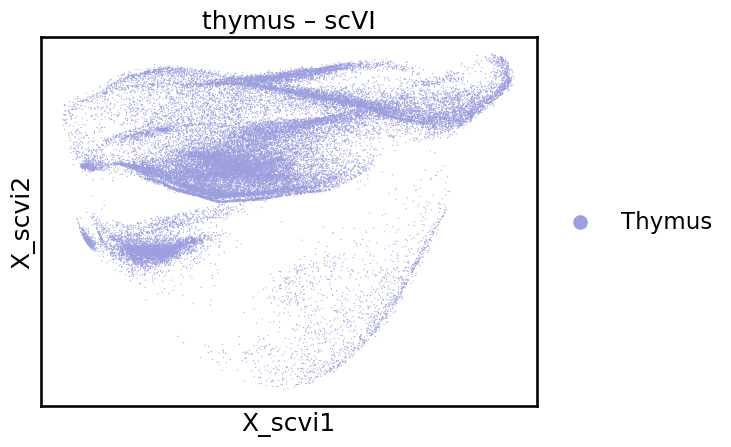

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


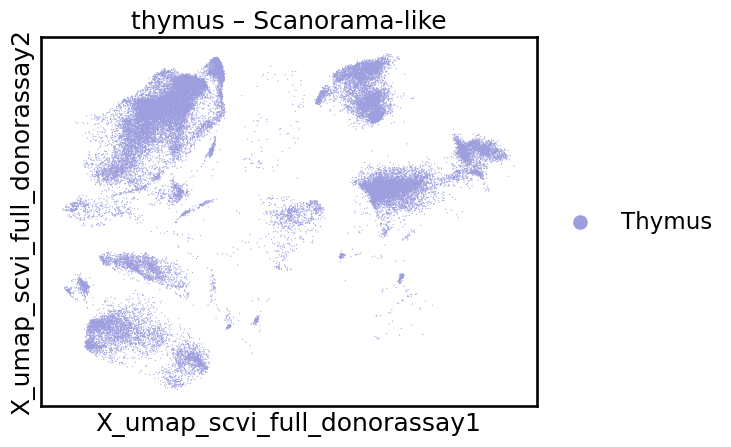

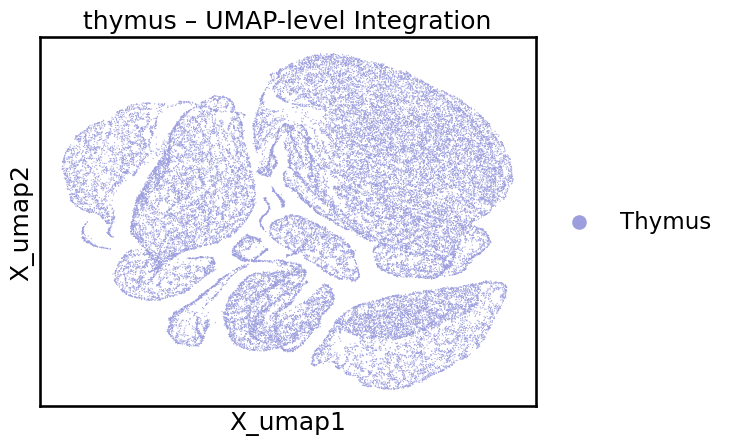

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
organs = {
    "spleen": adata_spleen,
    "lymph_node": adata_lymph,
    "bone_marrow": adata_bm,
    "thymus": adata_thy
}

embeddings = {
    "Uncorrected UMAP": "X_tissue_uncorrected_umap",
    "scVI": "X_scvi",
    "Scanorama-like": "X_umap_scvi_full_donorassay",
    "UMAP-level Integration": "X_umap"
}

import scanpy as sc

for organ_name, adata in organs.items():
    print(f"===== {organ_name.upper()} =====")
    for title, emb in embeddings.items():
        if emb in adata.obsm:
            sc.pl.embedding(
                adata,
                basis=emb,
                color="tissue" if "tissue" in adata.obs else None,
                title=f"{organ_name} – {title}",
                show=True
            )
        else:
            print(f"{emb} not found in {organ_name}")


In [1]:
!pip install scib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 10.9 MB/s eta 0:00:00


In [3]:
embeddings = {
    "baseline": "X_tissue_uncorrected_umap",
    "scVI": "X_scvi",
    "scanorama": "X_umap_scvi_full_donorassay",
    "umap": "X_umap"
}


In [4]:
import scib
import pandas as pd

def score_integration(adata, batch_key="donor", label_key="cell_type"):
    scores = {}

    for name, emb in embeddings.items():
        if emb not in adata.obsm:
            continue

        print(f"Scoring {name}...")

        scores[name] = {
            "graph_connectivity": scib.me.graph_connectivity(adata, label_key),
            "lisi_batch": scib.me.lisi(adata, batch_key, type_="batch"),
            "lisi_celltype": scib.me.lisi(adata, label_key, type_="cell"),
            "silhouette_batch": scib.me.silhouette_batch(adata, batch_key),
            "silhouette_cell": scib.me.silhouette(adata, label_key),
            "nmi": scib.me.nmi(adata, label_key)
        }

    return pd.DataFrame(scores).T


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [7]:
%whos


Variable            Type        Data/Info
-----------------------------------------
embeddings          dict        n=4
pd                  module      <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
scib                module      <module 'scib' from '/usr<...>ckages/scib/__init__.py'>
score_integration   function    <function score_integration at 0x7f2485755300>


In [11]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [14]:
!ls "/content/drive/MyDrive/group project 5243"


Bone_Marrow_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
Lymph_Node_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
Spleen_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad
Thymus_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad


In [15]:
import scanpy as sc
import numpy as np

def load_for_metrics(path, n_cells=5000):
    adata = sc.read_h5ad(path, backed='r')  # 不一次性读 X
    idx = np.random.choice(adata.n_obs, n_cells, replace=False)
    adata = adata[idx, :].to_memory()       # 只加载 5000 个细胞到内存
    print("Loaded:", adata.shape)
    return adata


In [17]:
adata_spleen = load_for_metrics(
    "/content/drive/MyDrive/group project 5243/Spleen_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"
)


Loaded: (5000, 61806)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [18]:
adata_spleen.obs.columns


Index(['donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate',
       'library_plate', 'notes', 'cdna_well', 'old_index', 'assay',
       'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal',
       'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay',
       'cell_ontology_class', 'cell_ontology_id', 'compartment',
       'broad_cell_class', 'free_annotation', 'manually_annotated',
       'published_2022', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc',
       'pct_counts_ercc', '_scvi_batch', '_scvi_labels',
       'scvi_leiden_donorassay_full', 'age', 'sex', 'ethnicity',
       'scvi_leiden_res05_tissue', 'sample_number'],
      dtype='object')

In [19]:
sc.pp.highly_variable_genes(adata_spleen, n_top_genes=2000)
sc.pp.scale(adata_spleen)
sc.tl.pca(adata_spleen, n_comps=50)


/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [20]:
sc.pp.neighbors(adata_spleen)
sc.tl.leiden(adata_spleen)


/tmp/ipython-input-2985606232.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_spleen)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [13]:
import scanpy as sc
import numpy as np
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
import gc

# Load data
file_path = "/content/drive/MyDrive/group project 5243/Spleen_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"

print("Loading data...")
adata = sc.read_h5ad(file_path)
print(f"Original data size: {adata.n_obs} cells, {adata.n_vars} genes")

# Check the data structure
print("\n=== Data Structure Check ===")
print(f"adata.obs columns: {list(adata.obs.columns)}")
print(f"adata.obsm keys: {list(adata.obsm.keys())}")
print(f"adata.uns keys: {list(adata.uns.keys())}")

# Preview obs table
print("\nShowing first 5 rows of adata.obs:")
print(adata.obs.head())

# Detect possible batch and label columns
print("\n=== Searching for Batch and Cell-type Columns ===")

possible_batch_keys = ['donor', 'batch', 'sample', 'donor_id', 'Donor', 'DONOR']
batch_key = None
for key in possible_batch_keys:
    if key in adata.obs.columns:
        batch_key = key
        print(f"Batch column detected: {key}, number of unique batches: {adata.obs[key].nunique()}")
        break

possible_label_keys = [
    'leiden', 'cell_type', 'celltype', 'CellType', 'cluster',
    'louvain', 'cell_type_annotation', 'annotation', 'label',
    'leiden_scVI', 'leiden_scvi', 'cell_ontology_class'
]
label_key = None
for key in possible_label_keys:
    if key in adata.obs.columns:
        label_key = key
        print(f"Cell-type / cluster column detected: {key}, number of categories: {adata.obs[key].nunique()}")
        if adata.obs[key].nunique() < 50:
            print("  Top categories:")
            print(adata.obs[key].value_counts().head(10))
        break

# If no cluster labels found, compute Leiden clustering
if label_key is None:
    print("\nNo cluster labels found — computing Leiden clustering...")

    # Optional: subsampling to reduce memory
    n_sample = 5000
    if adata.n_obs > n_sample:
        print(f"Subsampling to {n_sample} cells...")
        np.random.seed(42)
        idx = np.random.choice(adata.n_obs, n_sample, replace=False)
        adata = adata[idx].copy()
        gc.collect()

    if 'X_pca' not in adata.obsm:
        print("Computing PCA...")
        sc.pp.pca(adata, n_comps=50)

    if 'distances' not in adata.obsp:
        print("Computing neighbors...")
        sc.pp.neighbors(adata, n_pcs=30)

    print("Running Leiden clustering...")
    sc.tl.leiden(adata, resolution=1.0)
    label_key = 'leiden'
    print(f"Leiden clustering completed. Number of clusters: {adata.obs[label_key].nunique()}")

# Start evaluation
if batch_key and label_key:
    print(f"\n=== Evaluating Integration Using batch_key='{batch_key}', label_key='{label_key}' ===")

    # Subsample for efficiency
    if adata.n_obs > 5000:
        print("Subsampling to 5000 cells for evaluation...")
        np.random.seed(42)
        idx = np.random.choice(adata.n_obs, 5000, replace=False)
        adata_eval = adata[idx].copy()
    else:
        adata_eval = adata

    print(f"Evaluation dataset size: {adata_eval.n_obs} cells")

    scores = {}

    # 1. ARI
    try:
        scores['ARI'] = adjusted_rand_score(adata_eval.obs[batch_key], adata_eval.obs[label_key])
        print(f"ARI: {scores['ARI']:.3f}")
    except Exception as e:
        print(f"ARI calculation failed: {e}")
        scores['ARI'] = np.nan

    # 2. NMI
    try:
        scores['NMI'] = normalized_mutual_info_score(adata_eval.obs[batch_key], adata_eval.obs[label_key])
        print(f"NMI: {scores['NMI']:.3f}")
    except Exception as e:
        print(f"NMI calculation failed: {e}")
        scores['NMI'] = np.nan

    # 3. Silhouette scores
    if 'X_pca' in adata_eval.obsm:
        try:
            X = adata_eval.obsm['X_pca'][:, :10]  # Use first 10 PCs

            # batch silhouette (closer to 0 means better mixing)
            sil_batch = silhouette_score(X, adata_eval.obs[batch_key])
            scores['batch_silhouette'] = sil_batch
            scores['batch_mixing'] = 1 - abs(sil_batch)

            print(f"Batch silhouette: {sil_batch:.3f} (mixing score: {scores['batch_mixing']:.3f})")

            # cell-type separation silhouette (higher is better)
            if adata_eval.obs[label_key].nunique() > 1:
                sil_cell = silhouette_score(X, adata_eval.obs[label_key])
                scores['celltype_silhouette'] = sil_cell
                print(f"Cell-type silhouette: {sil_cell:.3f}")

        except Exception as e:
            print(f"Silhouette calculation failed: {e}")

    # Output final results
    results = pd.DataFrame(scores, index=['Spleen'])
    print("\n=== Final Evaluation Scores ===")
    print(results.T)

    results.to_csv('/content/spleen_integration_scores.csv')
    print("\nSaved results to: /content/spleen_integration_scores.csv")

else:
    print("\nERROR: Could not detect valid batch or label columns.")
    print(f"Available columns: {list(adata.obs.columns)}")


Loading data...
Original data size: 70448 cells, 61806 genes

=== Data Structure Check ===
adata.obs columns: ['donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', '_scvi_batch', '_scvi_labels', 'scvi_leiden_donorassay_full', 'age', 'sex', 'ethnicity', 'scvi_leiden_res05_tissue', 'sample_number']
adata.obsm keys: ['X_pca', 'X_scvi', 'X_tissue_uncorrected_umap', 'X_umap', 'X_umap_scvi_full_donorassay', 'X_umap_tissue_scvi_donorassay', 'X_uncorrected_umap']
adata.uns keys: ['_scvi_manager_uuid', '_scvi_uuid', '_training_mode', 'age_

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    normalized_mutual_info_score,
    adjusted_rand_score,
)
import gc
import warnings
warnings.filterwarnings('ignore')

# ========= 1. Load only the required data =========
file_path = "/content/drive/MyDrive/group project 5243/Spleen_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"
print("Loading data...")

# Load metadata only first
adata_spleen = sc.read_h5ad(file_path, backed='r')
print(f"Original dataset size: {adata_spleen.n_obs} cells")

# Sample 5000 cells into memory
n_sample = 5000
print(f"Randomly sampling {n_sample} cells...")
np.random.seed(42)
idx = np.random.choice(adata_spleen.n_obs, n_sample, replace=False)

adata_spleen = adata_spleen[idx].to_memory()
gc.collect()
print(f"Working dataset size: {adata_spleen.n_obs} cells")

# ========= 2. Simplified evaluation function =========
def compute_embedding_metrics_lite(adata, emb_key, batch_key="donor"):
    """
    Lightweight metric computation to reduce memory usage.
    """
    if emb_key not in adata.obsm:
        return None

    # Extract embedding
    X = np.asarray(adata.obsm[emb_key], dtype=np.float32)

    # Reduce dimensionality if too high
    if X.shape[1] > 10:
        X = X[:, :10]

    # Convert batch labels to integer codes
    batch = adata.obs[batch_key].astype('category').cat.codes.values
    n_batches = len(np.unique(batch))

    # Determine number of clusters
    n_clusters = min(6, n_batches * 2)
    n_clusters = max(2, n_clusters)

    print(f"  Computing {emb_key} (dims={X.shape[1]}, clusters={n_clusters})")

    # Run K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=3)
    cluster = kmeans.fit_predict(X)

    metrics = {}

    # Sample subset for silhouette scores
    sample_size = min(1000, len(X))
    sample_idx = np.random.choice(len(X), sample_size, replace=False)
    X_sample = X[sample_idx]
    batch_sample = batch[sample_idx]
    cluster_sample = cluster[sample_idx]

    # 1) Batch silhouette
    if n_batches > 1:
        metrics["silhouette_batch"] = silhouette_score(X_sample, batch_sample)
    else:
        metrics["silhouette_batch"] = 0.0

    # 2) Cluster silhouette
    metrics["silhouette_cluster"] = silhouette_score(X_sample, cluster_sample)

    # 3) NMI
    metrics["NMI_batch_cluster"] = normalized_mutual_info_score(batch, cluster)

    # 4) ARI
    metrics["ARI_batch_cluster"] = adjusted_rand_score(batch, cluster)

    # 5) CH score
    metrics["calinski_harabasz"] = calinski_harabasz_score(X, cluster)

    # 6) DB score
    metrics["davies_bouldin"] = davies_bouldin_score(X, cluster)

    # Clear memory
    del X, X_sample
    gc.collect()

    return metrics

# ========= 3. Check available embeddings =========
print("\nAvailable embeddings:")
for key in adata_spleen.obsm.keys():
    print(f"  - {key}")

# ========= 4. Define candidate embeddings =========
embeddings = {
    "baseline_uncorrected": "X_tissue_uncorrected_umap",
    "scVI": "X_scvi",
    "scanorama_like": "X_umap_scvi_full_donorassay",
    "umap_integration": "X_umap",
}

# Keep only those that exist
available_embeddings = {k: v for k, v in embeddings.items() if v in adata_spleen.obsm}

# Add PCA baseline if needed
if len(available_embeddings) < 2 and "X_pca" in adata_spleen.obsm:
    available_embeddings["PCA_baseline"] = "X_pca"

print(f"\nEvaluating {len(available_embeddings)} embeddings")

# ========= 5. Compute metrics =========
results = []

for method_name, emb_key in available_embeddings.items():
    print(f"\nProcessing {method_name}...")

    try:
        metrics = compute_embedding_metrics_lite(
            adata_spleen,
            emb_key=emb_key,
            batch_key="donor"
        )

        if metrics:
            metrics["method"] = method_name
            metrics["basis"] = emb_key
            results.append(metrics)
            print("  ✓ Success")

            gc.collect()
    except Exception as e:
        print(f"  ✗ Failed: {e}")
        continue

# ========= 6. Display results =========
if results:
    scores_spleen = pd.DataFrame(results).set_index("method")

    print("\n" + "="*60)
    print("Spleen Integration Metrics (5000 cells sampled)")
    print("="*60)
    print(scores_spleen.round(3))

    # Ranking
    print("\nBatch mixing ranking (silhouette_batch, lower = better):")
    for i, (method, score) in enumerate(scores_spleen['silhouette_batch'].sort_values().items(), 1):
        print(f"  {i}. {method}: {score:.3f}")

    print("\nClustering quality ranking (silhouette_cluster, higher = better):")
    for i, (method, score) in enumerate(scores_spleen['silhouette_cluster'].sort_values(ascending=False).items(), 1):
        print(f"  {i}. {method}: {score:.3f}")

    # Save results
    scores_spleen.to_csv('/content/spleen_metrics_lite.csv')
    print("\nSaved results to: /content/spleen_metrics_lite.csv")

    # Minimal visualization
    try:
        import matplotlib.pyplot as plt

        fig, axes = plt.subplots(1, 3, figsize=(12, 4))

        key_metrics = ['silhouette_batch', 'silhouette_cluster', 'NMI_batch_cluster']

        for idx, metric in enumerate(key_metrics):
            ax = axes[idx]
            scores_spleen[metric].plot(kind='bar', ax=ax)
            ax.set_title(metric.replace('_', ' '))
            ax.set_xlabel('')
            ax.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.savefig('/content/spleen_metrics_key.png', dpi=80)
        plt.show()

        plt.close('all')
        gc.collect()

    except Exception as e:
        print(f"Visualization failed: {e}")

else:
    print("\nNo metrics computed.")

# Final cleanup
del adata_spleen
gc.collect()
print("\nDone! Memory cleared.")


In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    normalized_mutual_info_score,
    adjusted_rand_score,
)
import gc
import warnings
warnings.filterwarnings('ignore')

# ========= 1. Lightweight metric computation =========
def compute_embedding_metrics(adata, emb_key, batch_key="donor"):
    """
    Lightweight computation of 6 evaluation metrics.
    """
    if emb_key not in adata.obsm:
        return None

    # Extract embedding in float32 to reduce memory
    X = np.asarray(adata.obsm[emb_key], dtype=np.float32)

    # Use only the first 10 dimensions if too high
    if X.shape[1] > 10:
        X = X[:, :10]

    # Replace NaN and Inf values
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

    # Batch labels
    if batch_key not in adata.obs.columns:
        print(f"    Warning: {batch_key} not found, creating dummy batch")
        adata.obs[batch_key] = 'batch1'

    batch = adata.obs[batch_key].astype('category').cat.codes.values
    n_batches = len(np.unique(batch))

    # Fixed number of clusters (max 6)
    n_clusters = min(6, n_batches * 2, X.shape[0] // 10)
    n_clusters = max(2, n_clusters)

    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=3)
    cluster = kmeans.fit_predict(X)

    metrics = {}

    # Sample up to 1000 cells for silhouette score
    sample_size = min(1000, len(X))
    if sample_size < len(X):
        sample_idx = np.random.choice(len(X), sample_size, replace=False)
        X_sample = X[sample_idx]
        batch_sample = batch[sample_idx]
        cluster_sample = cluster[sample_idx]
    else:
        X_sample = X
        batch_sample = batch
        cluster_sample = cluster

    try:
        # 1) Batch silhouette (closer to 0 = better mixing)
        if n_batches > 1:
            metrics["silhouette_batch"] = silhouette_score(X_sample, batch_sample)
        else:
            metrics["silhouette_batch"] = 0.0

        # 2) Cluster silhouette (higher = better separation)
        metrics["silhouette_cluster"] = silhouette_score(X_sample, cluster_sample)

        # 3) NMI
        metrics["NMI_batch_cluster"] = normalized_mutual_info_score(batch, cluster)

        # 4) ARI
        metrics["ARI_batch_cluster"] = adjusted_rand_score(batch, cluster)

        # 5) Calinski-Harabasz
        metrics["calinski_harabasz"] = calinski_harabasz_score(X, cluster)

        # 6) Davies-Bouldin
        metrics["davies_bouldin"] = davies_bouldin_score(X, cluster)
    except Exception as e:
        print(f"    Metric computation error: {e}")
        return None

    del X
    if 'X_sample' in locals():
        del X_sample
    gc.collect()

    return metrics

# ========= 2. Embedding definitions =========
embeddings = {
    "baseline_uncorrected": "X_tissue_uncorrected_umap",
    "scVI": "X_scvi",
    "scanorama_like": "X_umap_scvi_full_donorassay",
    "umap_integration": "X_umap",
}

# ========= 3. Tissue-level evaluation function =========
def run_tissue_metrics(tissue_label, filename, n_cells=5000, batch_key="donor"):
    """
    Compute 6 metrics for a specific tissue.
    """
    print(f"\n{'='*60}")
    print(f"{tissue_label.upper()} Analysis")
    print('='*60)

    data_dir = "/content/drive/MyDrive/group project 5243"
    path = f"{data_dir}/{filename}"

    try:
        print("Loading data...")
        adata_full = sc.read_h5ad(path, backed='r')
        n = adata_full.n_obs
        print(f"Original dataset size: {n} cells")

        # Sampling
        n_cells = min(n_cells, n)
        print(f"Sampling {n_cells} cells...")
        np.random.seed(42)
        idx = np.random.choice(n, n_cells, replace=False)
        adata = adata_full[idx, :].to_memory()

        try:
            adata_full.file.close()
        except:
            pass

        del adata_full
        gc.collect()

        print(f"Working dataset size: {adata.n_obs} cells")

        # Check available embeddings
        print("\nAvailable embeddings:")
        available_embs = []
        for k in adata.obsm.keys():
            print(f"  - {k}")
            if k in embeddings.values():
                available_embs.append(k)

        print("\nComputing metrics...")
        results = []

        for method_name, emb_key in embeddings.items():
            if emb_key not in adata.obsm:
                print(f"  [Skipped] {method_name}: missing {emb_key}")
                continue

            print(f"  Processing {method_name}...")

            try:
                metrics = compute_embedding_metrics(
                    adata,
                    emb_key=emb_key,
                    batch_key=batch_key
                )

                if metrics:
                    metrics["method"] = method_name
                    metrics["basis"] = emb_key
                    results.append(metrics)
                    print("    ✓ Success")
                else:
                    print("    ✗ Failed")
            except Exception as e:
                print(f"    ✗ Error: {e}")
                continue

        if results:
            df = pd.DataFrame(results).set_index("method")

            print(f"\n{'-'*60}")
            print(f"{tissue_label} Integration Metrics ({adata.n_obs} cells)")
            print('-'*60)
            print(df.round(3))

            out_path = f"/content/{tissue_label}_metrics_lite.csv"
            df.to_csv(out_path)
            print(f"\nSaved results to: {out_path}")

            # Ranking
            print("\nBatch mixing ranking (silhouette_batch, closer to 0 = better):")
            for method, score in df["silhouette_batch"].sort_values().items():
                print(f"  {method}: {score:.3f}")

            print("\nClustering quality ranking (silhouette_cluster, higher = better):")
            for method, score in df["silhouette_cluster"].sort_values(ascending=False).items():
                print(f"  {method}: {score:.3f}")

            del adata
            gc.collect()

            return df
        else:
            print(f"\n{tissue_label}: No metrics computed")
            del adata
            gc.collect()
            return None

    except Exception as e:
        print(f"\nError occurred while processing {tissue_label}: {e}")
        gc.collect()
        return None

# ========= 4. Run for all tissues =========
all_results = {}

print("\n" + "="*60)
print("Starting evaluation for all tissues")
print("="*60)

tissues = [
    ("spleen", "Spleen_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"),
    ("lymph_node", "Lymph_Node_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"),
    ("bone_marrow", "Bone_Marrow_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"),
    ("thymus", "Thymus_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"),
]

for tissue_label, filename in tissues:
    result = run_tissue_metrics(
        tissue_label=tissue_label,
        filename=filename,
        n_cells=5000,
        batch_key="donor"
    )

    if result is not None:
        all_results[tissue_label] = result

    gc.collect()
    print(f"\n{tissue_label} completed. Memory cleared.")
    print("-"*60)

# ========= 5. Summary across all tissues =========
if all_results:
    print("\n" + "="*60)
    print("All tissues processed successfully!")
    print("="*60)

    summary_data = []
    for tissue, df in all_results.items():
        for method in df.index:
            row = df.loc[method].to_dict()
            row['tissue'] = tissue
            row['method'] = method
            summary_data.append(row)

    summary_df = pd.DataFrame(summary_data)
    summary_df.to_csv('/content/all_tissues_metrics_summary.csv', index=False)
    print("\nSaved summary results to: /content/all_tissues_metrics_summary.csv")

    print("\nBest integration method per tissue (batch mixing):")
    for tissue, df in all_results.items():
        best_method = df['silhouette_batch'].abs().idxmin()
        best_score = df.loc[best_method, 'silhouette_batch']
        print(f"  {tissue}: {best_method} (silhouette_batch = {best_score:.3f})")

    print("\nBest clustering method per tissue (cluster silhouette):")
    for tissue, df in all_results.items():
        best_method = df['silhouette_cluster'].idxmax()
        best_score = df.loc[best_method, 'silhouette_cluster']
        print(f"  {tissue}: {best_method} (silhouette_cluster = {best_score:.3f})")

print("\n" + "="*60)
print("Analysis complete!")
print("="*60)


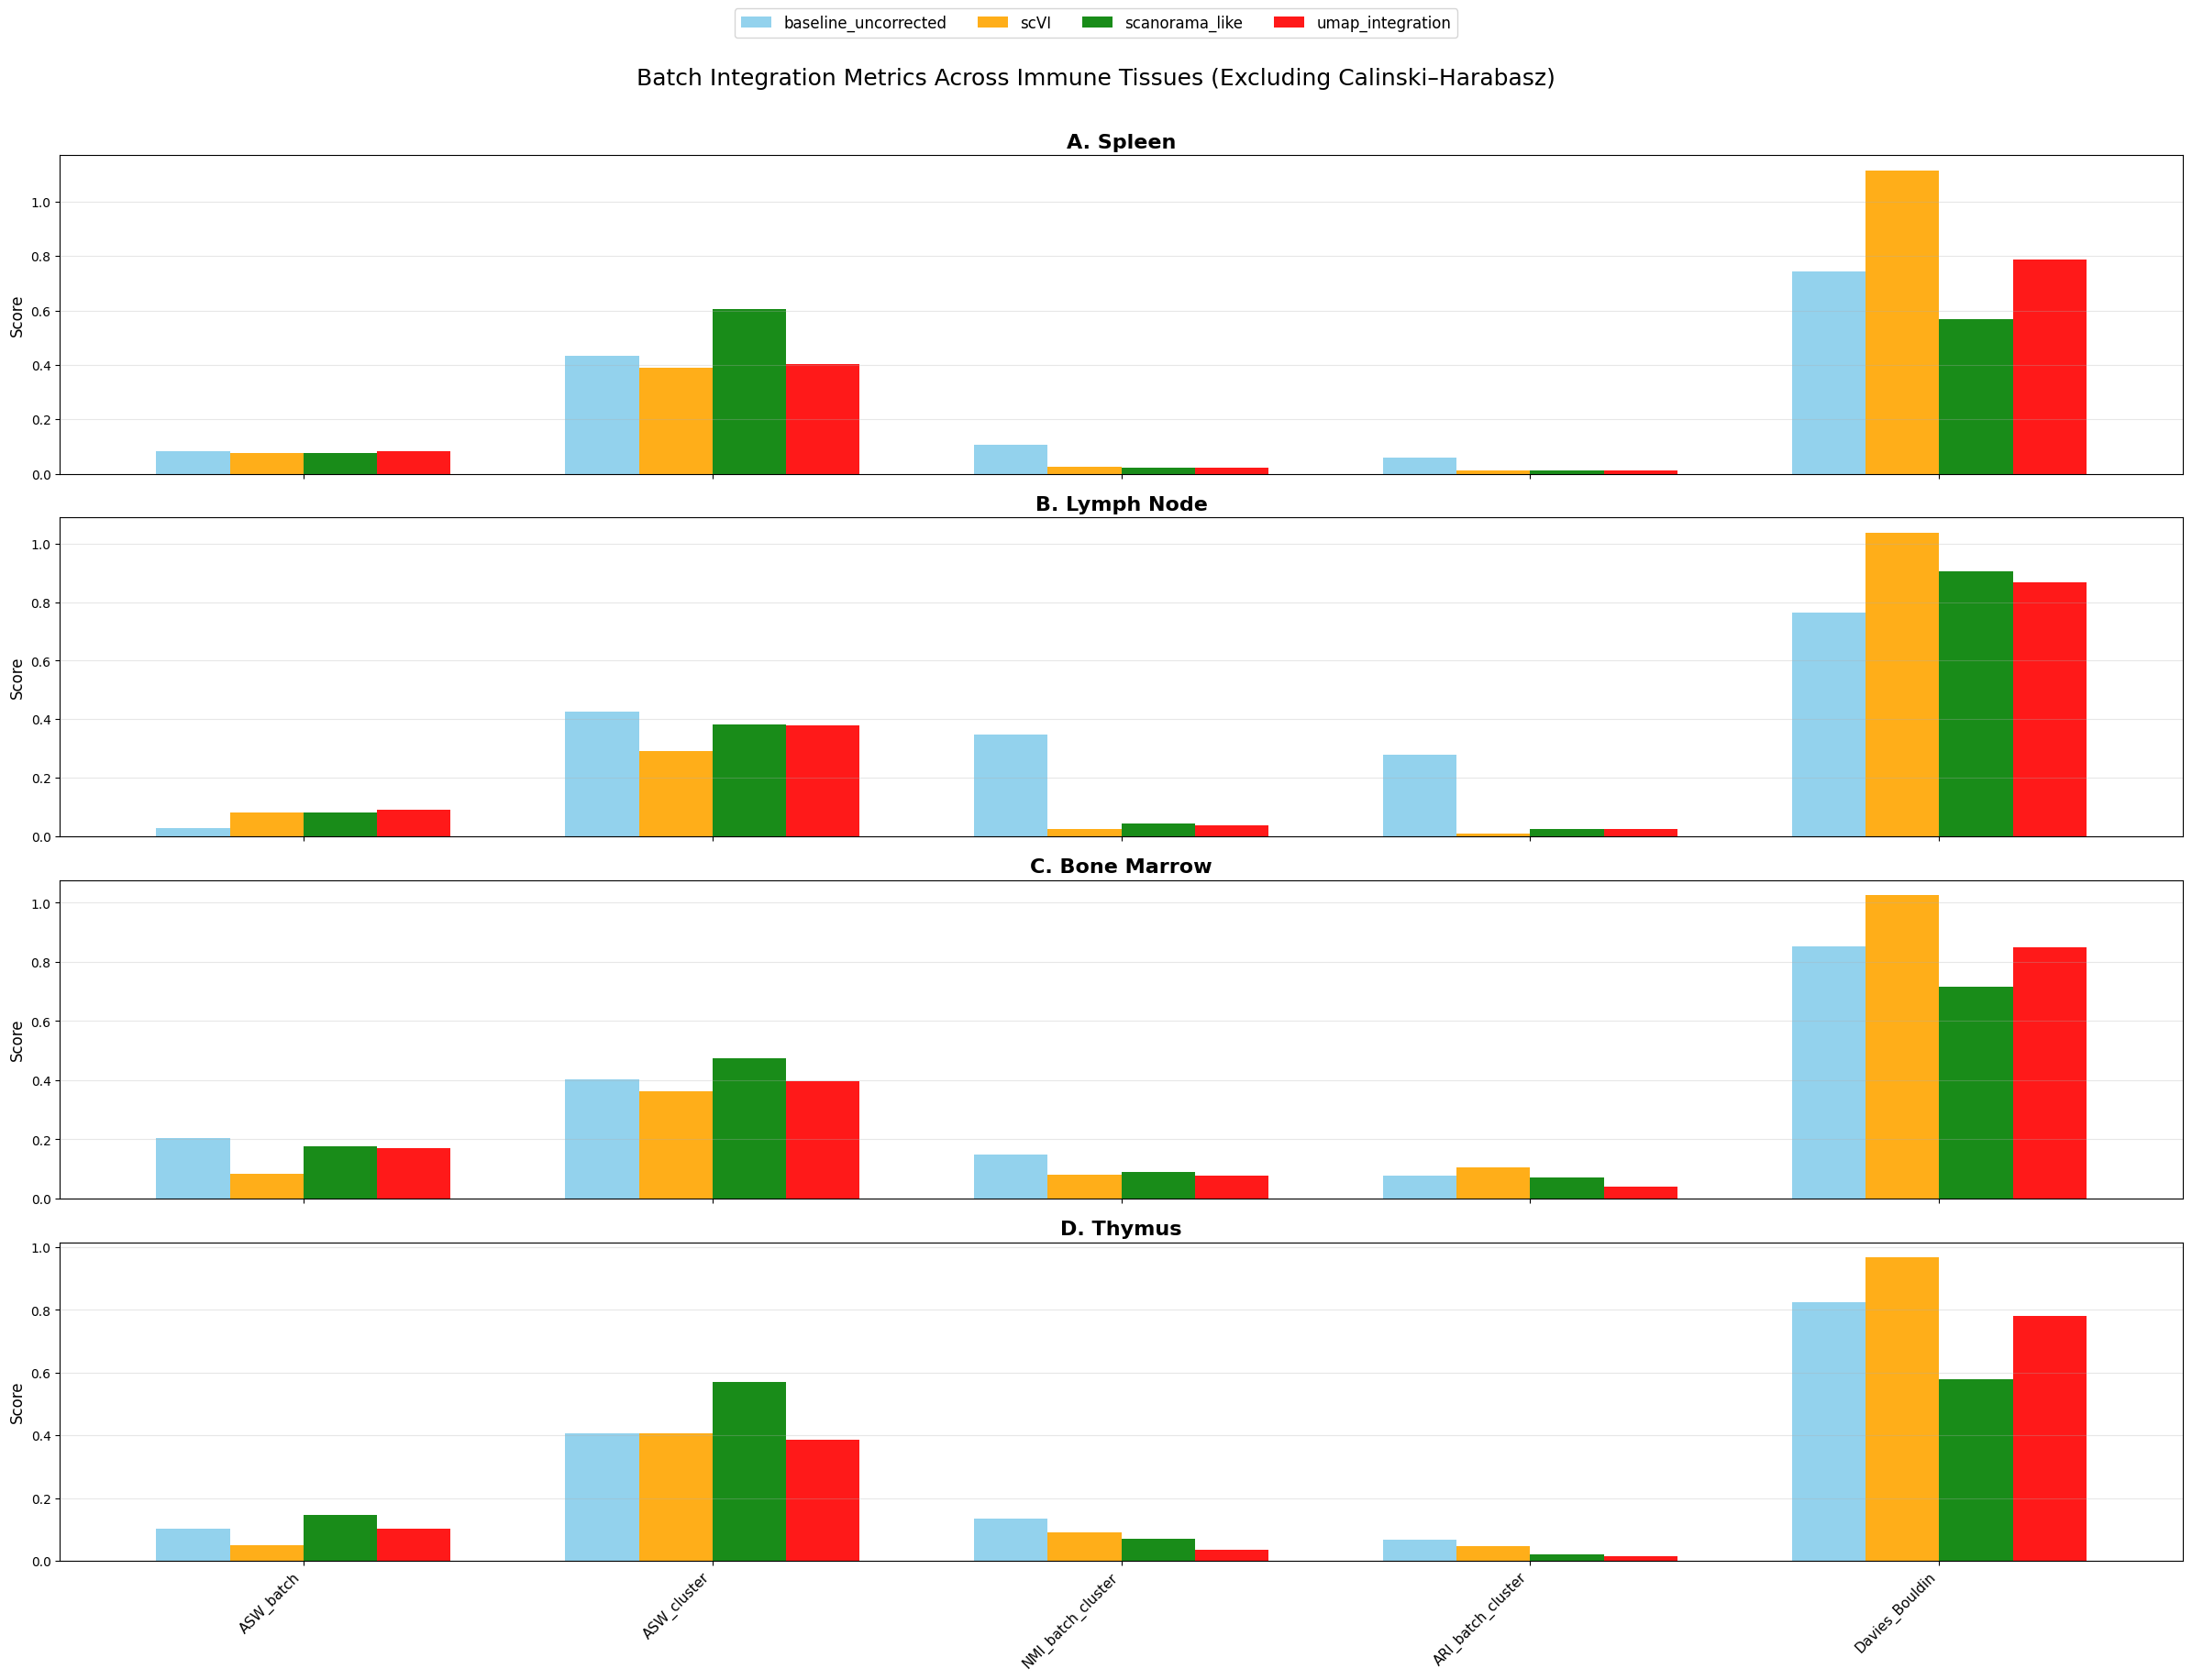

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load metric results for all four tissues ---
spleen = pd.read_csv("/content/spleen_metrics_lite.csv", index_col=0)
lymph  = pd.read_csv("/content/lymph_node_metrics_lite.csv", index_col=0)
bone   = pd.read_csv("/content/bone_marrow_metrics_lite.csv", index_col=0)
thymus = pd.read_csv("/content/thymus_metrics_lite.csv", index_col=0)

datasets = {
    "A. Spleen": spleen,
    "B. Lymph Node": lymph,
    "C. Bone Marrow": bone,
    "D. Thymus": thymus,
}

methods = ["baseline_uncorrected", "scVI", "scanorama_like", "umap_integration"]

# Keep only metrics with interpretable 0–1(ish) range;
# remove Calinski–Harabasz because its scale is much larger
metrics = [
    "silhouette_batch",
    "silhouette_cluster",
    "NMI_batch_cluster",
    "ARI_batch_cluster",
    "davies_bouldin",
]
metric_labels = [
    "ASW_batch",
    "ASW_cluster",
    "NMI_batch_cluster",
    "ARI_batch_cluster",
    "Davies_Bouldin",
]

colors = {
    "baseline_uncorrected": "skyblue",
    "scVI": "orange",
    "scanorama_like": "green",
    "umap_integration": "red",
}

# === Important step: convert silhouette_batch to absolute values ===
# This makes higher = better mixing performance across all tissues
for name in datasets:
    df = datasets[name]
    df.loc[:, "silhouette_batch"] = df["silhouette_batch"].abs()

# --- Create 4×1 panel figure ---
fig, axes = plt.subplots(4, 1, figsize=(24, 18), sharex=True)

bar_width = 0.18
x = np.arange(len(metrics))

for (title, df), ax in zip(datasets.items(), axes):
    for i, method in enumerate(methods):
        ax.bar(
            x + i * bar_width,
            df.loc[method, metrics],
            width=bar_width,
            label=method,
            color=colors[method],
            alpha=0.9,
        )

    ax.set_title(title, fontsize=16, fontweight="bold")
    ax.set_ylabel("Score", fontsize=12)
    ax.grid(axis="y", alpha=0.3)

# X-axis only on the last subplot
axes[-1].set_xticks(x + bar_width * 1.5)
axes[-1].set_xticklabels(metric_labels, rotation=45, ha="right", fontsize=11)

fig.suptitle(
    "Batch Integration Metrics Across Immune Tissues (Excluding Calinski–Harabasz)",
    fontsize=18,
)
fig.legend(methods, fontsize=12, loc="upper center", ncol=4, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("/content/ALL_TISSUES_4x1_NO_CH_ABS_ASW.png", dpi=300)
plt.show()
